This notebook acts to create figures and analyze the results of Elastic Net training on various Datasets of GSE40279, which was used by Hannum et. al. for their elastic net models (in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3780611/), with certain portions of the non-clock CpGs removed. This analysis includes comparing the CpGs chosen as Clock CpGs for each of these models, determine what portion of the original clock CpGs go unused, comparing the weight which each model assigns to it's clock CpGs, and determining the linearity of individual clock CpGs. This program produces figures 3 for the paper and several supplementary figures. For convenience the program should produce these figures and others if the run all option is selected. The Elastic Net models used in this file and all datasets with CpGs removed were generated by the "Remove NonSig CpGs" file. The original data set is also generated in the forementioned file

In [1]:
#import libraries used in this file
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
import random

%matplotlib inline

In [2]:
#When given two lists as inputs this function finds all of the common items between the two lists and returns
#the results as a list.
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [3]:
#When given two lists as inputs this function finds all of the items in list1, which are not also in list two,
#and returns these items as a list.
def loss(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    return lst3


# Load the original GSE40279 dataset and Elastic Net model trained on this dataset in "Remove NonSig CpGs"

In [ ]:
#find the parent directory
import os
import sys
sys.path.append('..')

print(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
parent = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [4]:
#load in the original dataset
hannum_raw = pd.read_pickle(parent + '/MethylAndAges/Hannum raw.pkl')

In [5]:
hannum_raw

,GSM989827,GSM989828,GSM989829,GSM989830,GSM989831,GSM989832,GSM989833,GSM989834,GSM989835,GSM989836,...,GSM990618,GSM990619,GSM990620,GSM990621,GSM990622,GSM990623,GSM990624,GSM990625,GSM990626,GSM990627
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.464197,0.454883,0.485764,0.480785,0.501219,0.499918,0.485852,0.512442,0.518155,0.417986,...,0.560958,0.472081,0.508502,0.505193,0.443411,0.527496,0.588331,0.362994,0.499145,0.458600
cg00000108,0.941091,0.939033,0.918802,0.929908,0.934548,0.950543,0.925855,0.941330,0.938528,0.933814,...,0.934699,0.978612,0.922024,0.963052,0.992631,0.958173,0.982450,0.954392,0.931691,0.974731
cg00000109,0.911182,0.596455,0.870333,0.889689,0.890450,0.898493,0.893972,0.892010,0.900841,0.883539,...,0.881957,0.926289,0.930091,0.946547,0.929131,0.922034,0.855145,0.927183,0.900938,0.829869
cg00000165,0.132014,0.206917,0.162861,0.197780,0.148437,0.224093,0.400489,0.194553,0.134710,0.204569,...,0.199883,0.165116,0.210248,0.177351,0.118742,0.223068,0.162180,0.196430,0.167477,0.170578
cg00000236,0.717861,0.723935,0.719196,0.704061,0.754913,0.829192,0.723782,0.695142,0.731872,0.742913,...,0.759011,0.792883,0.730367,0.783830,0.787089,0.778959,0.796869,0.713020,0.730215,0.782844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98937537R,0.042808,0.036811,0.042844,0.042258,0.039613,0.035309,0.031304,0.031119,0.031373,0.039919,...,0.051150,0.049286,0.071773,0.056795,0.041892,0.049571,0.055904,0.048526,0.056429,0.040701
ch.9.98957343R,0.052589,0.053343,0.045973,0.048733,0.039254,0.043023,0.037075,0.048277,0.041296,0.049226,...,0.051119,0.058118,0.059010,0.057837,0.037403,0.033060,0.062442,0.041087,0.047835,0.027499
ch.9.98959675F,0.035624,0.075618,0.126421,0.084051,0.165874,0.088889,0.097599,0.084294,0.052505,0.098726,...,0.077570,0.087988,0.098583,0.066481,0.001334,0.093414,0.101100,0.049857,0.028896,0.000000


In [6]:
#Load in the ages associated with Each GSM, and title their Column as Age
ages = pd.read_pickle(parent + '/MethylAndAges/Hannum ages.pkl')
ages = ages.rename(columns={ages.columns[0]: 'Age'})
ages

,Age
GSM989827,67.0
GSM989828,89.0
GSM989829,66.0
GSM989830,64.0
GSM989831,62.0
...,...
GSM990623,78.0
GSM990624,71.0
GSM990625,68.0
GSM990626,61.0


In [7]:
#Transpose our data such that each row is a GSM. This is needed to allow Standardization with StandardScaler
hannum_test = hannum_raw.T
hannum_test.columns.name = "CpG"
hannum_test 

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.945770F,ch.9.96055087R,ch.9.97139671F,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98959675F,ch.9.98989607R,ch.9.991104F
GSM989827,0.464197,0.941091,0.911182,0.132014,0.717861,0.686521,0.805003,0.228244,0.338483,0.016508,...,0.022659,0.109918,0.061222,0.034284,0.133692,0.042808,0.052589,0.035624,0.028066,0.043850
GSM989828,0.454883,0.939033,0.596455,0.206917,0.723935,0.619084,0.814672,0.310879,0.418998,0.005747,...,0.005095,0.076996,0.052640,0.027978,0.125270,0.036811,0.053343,0.075618,0.017428,0.032950
GSM989829,0.485764,0.918802,0.870333,0.162861,0.719196,0.635678,0.824336,0.263215,0.424736,0.012197,...,0.021444,0.070694,0.058888,0.032643,0.139105,0.042844,0.045973,0.126421,0.021752,0.022375
GSM989830,0.480785,0.929908,0.889689,0.197780,0.704061,0.610864,0.811152,0.316761,0.398772,0.019945,...,0.028587,0.094749,0.056279,0.036997,0.140601,0.042258,0.048733,0.084051,0.027504,0.053007
GSM989831,0.501219,0.934548,0.890450,0.148437,0.754913,0.651262,0.808628,0.338289,0.366965,0.000000,...,0.018626,0.110543,0.057568,0.036746,0.129993,0.039613,0.039254,0.165874,0.020889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.527496,0.958173,0.922034,0.223068,0.778959,0.709248,0.825768,0.354296,0.396241,0.001778,...,0.016319,0.079741,0.072076,0.052052,0.159212,0.049571,0.033060,0.093414,0.013654,0.014088
GSM990624,0.588331,0.982450,0.855145,0.162180,0.796869,0.535831,0.806713,0.295598,0.301319,0.006685,...,0.023837,0.117762,0.058466,0.037199,0.133899,0.055904,0.062442,0.101100,0.014193,0.000000
GSM990625,0.362994,0.954392,0.927183,0.196430,0.713020,0.664184,0.804045,0.395724,0.445179,0.003822,...,0.012054,0.079249,0.053499,0.050002,0.149589,0.048526,0.041087,0.049857,0.016840,0.041415
GSM990626,0.499145,0.931691,0.900938,0.167477,0.730215,0.665792,0.831365,0.338117,0.383953,0.000000,...,0.009878,0.090751,0.060335,0.040898,0.168269,0.056429,0.047835,0.028896,0.025346,0.052959


In [8]:
#Load the Elastic Net model trained on this data
elastic_netCV_original = load(parent + '/Trained_Models/elastic_netCV_Hannum_original.joblib')

In [9]:
#Get the non-zero coefficients of significant cpgs. 
coeffs_original = pd.DataFrame(elastic_netCV_original.coef_)
coeffs_original = coeffs_original[(coeffs_original.T != 0).any()]
coeffs_original = coeffs_original.rename(columns={coeffs_original.columns[0]: 'Magnitude'})
coeffs_original

,Magnitude
1029,0.044580
1121,-0.015875
1303,-0.010844
1363,0.050709
2722,0.009543
...,...
470604,-0.132771
471369,0.016129
472204,0.026252
472489,-0.029873


In [10]:
#Get significant CpGs and their indices
colnames = pd.DataFrame(hannum_test.columns)
sig_cpgs_original = colnames.iloc[coeffs_original.index]
sig_cpgs_original

,CpG
1029,cg00042478
1121,cg00047050
1303,cg00055986
1363,cg00058879
2722,cg00120464
...,...
470604,ch.11.315572F
471369,ch.19.1716179R
472204,ch.4.60646130F
472489,ch.6.2574971F


In [11]:
#Generate a table which ranks all 849 Clock Cpgs from highest absolute model weight to lowest
coeff_test = coeffs_original.reindex(coeffs_original.Magnitude.abs().sort_values(ascending=False).index)
coeff_test["CpG"] = colnames.iloc[coeff_test.index]
coeff_test["Rank"] = [i for i in range(1,len(coeff_test.index)+1)]
coeff_test.head(100)

,Magnitude,CpG,Rank
301866,0.696950,cg16867657,1
194163,-0.623237,cg10501210,2
152882,0.520976,cg08097417,3
259992,0.425279,cg14361627,4
125881,0.425046,cg06639320,5
...,...,...,...
381942,-0.110594,cg22112832,96
52538,0.110100,cg02650266,97
422693,0.109870,cg24724428,98
400855,-0.109649,cg23341182,99


In [12]:
#Find the linearity, represented by the rvalue of a linear regression, of each CpG with Age, then add this to 
# a new table, which includes the values from our previous table

r_values =[]

coeff_test_df1 = coeff_test.copy() 
for item in coeff_test.index:
    cpg = hannum_test.T.iloc[item].astype(float)
    regression = stats.linregress(cpg, ages.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    r_values.append(rvalue)
    

coeff_test_df1["rvalue"] = r_values
coeff_test_df1

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
194163,-0.623237,cg10501210,2,-0.726036
152882,0.520976,cg08097417,3,0.615264
259992,0.425279,cg14361627,4,0.613768
125881,0.425046,cg06639320,5,0.747103
...,...,...,...,...
197057,-0.000058,cg10665390,843,0.071378
239133,0.000045,cg13327545,844,0.363164
365187,-0.000029,cg20973931,845,-0.331728
328612,-0.000026,cg18568843,846,-0.553744


In [13]:
# reorganize this table from highest to lowest absolute rvalue. 
coeff_test_df1 = coeff_test_df1.reindex(coeff_test_df1.rvalue.abs().sort_values(ascending=False).index)
coeff_test_df1

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
125881,0.425046,cg06639320,5,0.747103
422693,0.109870,cg24724428,98,0.744579
386707,0.271665,cg22454769,8,0.743994
194163,-0.623237,cg10501210,2,-0.726036
...,...,...,...,...
470521,0.001940,ch.11.110310046R,819,0.001010
214544,-0.023770,cg11757894,514,-0.000949
67422,-0.025904,cg03428951,490,0.000099
314695,0.046817,cg17707930,323,-0.000095


print the absolute mean and mean rvalues for the original Clock Cpgs

In [14]:
print(coeff_test_df1["rvalue"].abs().mean())

0.22114966207370768


In [15]:
print(coeff_test_df1["rvalue"].mean())

-0.00677351459746267


# Determine if Hanum's 71 CpGs are Clock CpGs
Here we compare Hannum's 71 methylation markers selected after 500 rounds of bootstrapping to our clock CpGs, finding which are used here and which are not. The Correct excel files from the relevant paper must be loaded from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3780611/https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3780611/

In [16]:
#Load in Hannum's 71, and find the CpGs not used by our model in two fashions
Hannum_CpGs = pd.read_excel('NIHMS418935-supplement-02.xlsx', sheet_name="Model_PrimaryData", index_col=0 ) 
listH = loss(Hannum_CpGs.index.to_list(), sig_cpgs_original["CpG"].to_list())
trim = loss(sig_cpgs_original["CpG"].to_list(), Hannum_CpGs.index.to_list())
print(str(len(listH)) + " Of Hannum's 71 CpGs are not Clock CpGs in our original model")

17 Of Hannum's 71 CpGs are not Clock CpGs in our original model


In [17]:
#Create a new table of all of the original Clock CpGs which are in Hannum's 71.
Hannum_CrossOver = coeff_test_df1.copy()

for item in trim:
    Hannum_CrossOver = Hannum_CrossOver[(Hannum_CrossOver["CpG"].str.contains(item)==False)]
Hannum_CrossOver 

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
125881,0.425046,cg06639320,5,0.747103
386707,0.271665,cg22454769,8,0.743994
194163,-0.623237,cg10501210,2,-0.726036
412466,0.062503,cg24079702,247,0.707402
143281,0.032831,cg07553761,418,0.700060
339304,-0.154715,cg19283806,49,-0.678651
94604,0.161923,cg04875128,43,0.665003
266487,0.081301,cg14692377,178,0.654184
288086,-0.033838,cg16054275,408,-0.645802


# Determine if DeepmAge's  CpGs are Clock CpGs
Here we compare the DeepmAge DNAm clock's (by Galkin et. al.: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8279523/) 1000 methylation markers to our clock CpGs, finding which are used here and which are not

In [18]:
#Load in DeepmAge's 1000, and find the CpGs not used by our model in two fashions
mAge_CpGs = pd.read_excel('TableS2_DeepMAge_features_w_importance_scores.xlsx', sheet_name="TableS2_DeepMAge_features_w_imp", index_col=0 ) 
listm = loss(mAge_CpGs.index.to_list(), sig_cpgs_original["CpG"].to_list())
trim = loss(sig_cpgs_original["CpG"].to_list(), mAge_CpGs.index.to_list())
print(str(len(listm)) + " Of DeepmAge's 1000 CpGs are not Clock CpGs in our original model")

985 Of DeepmAge's 1000 CpGs are not Clock CpGs in our original model


In [19]:
#Create a new table of the original Clock CpGs which are in DeepmAge's 1000.
mAge_CrossOver = coeff_test_df1.copy()

for item in trim:
    mAge_CrossOver = mAge_CrossOver[(mAge_CrossOver["CpG"].str.contains(item)==False)]
mAge_CrossOver 

,Magnitude,CpG,Rank,rvalue
390947,0.066019,cg22736354,232,0.645268
182359,-0.297450,cg09809672,7,-0.597960
123183,0.221819,cg06493994,19,0.584612
464406,0.140808,cg27320127,63,0.556533
87248,-0.044682,cg04474832,332,-0.548490
78171,-0.009109,cg03996822,711,-0.541026
452423,-0.003275,cg26614073,803,-0.508487
459321,-0.084179,cg27015931,164,-0.472595
3697,-0.005512,cg00168942,768,-0.450829
93796,0.011148,cg04836038,673,0.443157


Very small percentage (1.5%) from DeepMage are in clocks

# Find CpGs never removed
Here we look at all of our Elastic Net models trained on GSE40279 datasets with non-significant CpGs removed. We find CpGs which are clock CpGs in all models and those which are not, and compare their properties

In [20]:
#Generate empty lists for those CpGs which are not always clocks and those which are
never_lost = []
everlost = []

In [21]:
#This cell runs for models with 1-10% of originally non-significant CpGs removed
for i in range(1,11):
    
    #load in the model and dataset
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #find clock CpGs from the original Clock not included in the new set
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #save lost CpGs to a list
    for item in lost_cpg:
        everlost.append(item)

#find clock CpGs from the original model not included in everlost
never_lost = loss(sig_cpgs_original["CpG"].to_list(), everlost ) 


In [22]:
#This cell runs for models with 20-100% of originally non-significant CpGs removed
for i in range(20,110, 10):
    
    #load in the model and dataset
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #find clock CpGs from the original Clock not included in the new set
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #save lost CpGs to a list
    for item in lost_cpg:
        everlost.append(item)
        
#find clock CpGs from the original model not included in everlost
never_lost = loss(sig_cpgs_original["CpG"].to_list(), everlost ) 


In [23]:
#print the number of Clock CpGs never lost
print(str(len(never_lost)) + "Clock CpGs are never lost.")

471Clock CpGs are never lost.


Roughly 478 of 847 never lost. This is ~ 56%

In [24]:
#create a table with model weight, rvalue, and rank for each CpG which is always a Clock Cpg
never_lost_df = coeff_test_df1.copy()

for item in everlost:
    never_lost_df = never_lost_df[(never_lost_df["CpG"].str.contains(item)==False)]
never_lost_df    

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
125881,0.425046,cg06639320,5,0.747103
422693,0.109870,cg24724428,98,0.744579
386707,0.271665,cg22454769,8,0.743994
194163,-0.623237,cg10501210,2,-0.726036
...,...,...,...,...
464875,-0.070592,cg27350356,212,-0.001460
84469,0.018950,cg04323187,569,-0.001277
214544,-0.023770,cg11757894,514,-0.000949
67422,-0.025904,cg03428951,490,0.000099


In [25]:
#Re-order the table from highest absolute rvalue to lowest
never_lost_df = never_lost_df.reindex(never_lost_df.rvalue.abs().sort_values(ascending=False).index)
never_lost_df

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
125881,0.425046,cg06639320,5,0.747103
422693,0.109870,cg24724428,98,0.744579
386707,0.271665,cg22454769,8,0.743994
194163,-0.623237,cg10501210,2,-0.726036
...,...,...,...,...
464875,-0.070592,cg27350356,212,-0.001460
84469,0.018950,cg04323187,569,-0.001277
214544,-0.023770,cg11757894,514,-0.000949
67422,-0.025904,cg03428951,490,0.000099


print the absolute mean and mean rvalues for the "never lost" Clock Cpgs

In [26]:
print(never_lost_df["rvalue"].abs().mean())

0.21876651399914265


In [27]:
print(never_lost_df["rvalue"].mean())

0.017886099270980435


In [28]:
#Save the Table of "never lost" CpGs
never_lost_df.to_pickle("CpGs_never_lost.pkl")

In [29]:
#create a table with model weight, rvalue, and rank for each CpG which is not always a Clock Cpg
ever_lost_df = coeff_test_df1.copy()
for item in never_lost_df["CpG"].tolist():
    ever_lost_df = ever_lost_df[(ever_lost_df["CpG"].str.contains(item)==False)]

ever_lost_df

,Magnitude,CpG,Rank,rvalue
143281,0.032831,cg07553761,418,0.700060
128661,0.009221,cg06784991,708,0.673407
266487,0.081301,cg14692377,178,0.654184
39388,-0.020828,cg01974375,543,-0.648142
288086,-0.033838,cg16054275,408,-0.645802
...,...,...,...,...
77749,0.029633,cg03976326,450,0.003187
169871,0.027828,cg09069072,465,0.002979
207704,-0.009707,cg11327565,696,0.002642
470521,0.001940,ch.11.110310046R,819,0.001010


In [30]:
#Re-order the table from highest absolute rvalue to lowest
ever_lost_df1 = ever_lost_df.reindex(ever_lost_df.rvalue.abs().sort_values(ascending=False).index)
ever_lost_df1

,Magnitude,CpG,Rank,rvalue
143281,0.032831,cg07553761,418,0.700060
128661,0.009221,cg06784991,708,0.673407
266487,0.081301,cg14692377,178,0.654184
39388,-0.020828,cg01974375,543,-0.648142
288086,-0.033838,cg16054275,408,-0.645802
...,...,...,...,...
77749,0.029633,cg03976326,450,0.003187
169871,0.027828,cg09069072,465,0.002979
207704,-0.009707,cg11327565,696,0.002642
470521,0.001940,ch.11.110310046R,819,0.001010


print the absolute mean and mean rvalues for the "ever lost" Clock Cpgs

In [31]:
print(ever_lost_df["rvalue"].abs().mean())

0.22413493532668688


In [32]:
print(ever_lost_df["rvalue"].mean())

-0.03766361601245387


In [33]:
#Save the Table of "ever lost" CpGs
ever_lost_df.to_pickle(parent + '/Trained_Models/CpGs_ever_lost.pkl')

Note that the Second Lowest rvalue CpG is never removed and that the mean magnitude of rvalue also slightly decreases between the "never lost" CpGs and the original Clock Cpgs. So Removing Random CpGs is not producing a list of CpGs with more significant rvalues, though the average rvalue is significantly more positive. The Average rvalue of those "ever removed" is slightly higher than those never lost or the original group

# Find crossover between never lost and Hannum's 71 CpGs in originally significant set 

In [34]:
#Find Cpgs which are in the "ever lost" group and not in the list of Hannum _CrossOver CpGs
non_Hannum_lost = loss(ever_lost_df["CpG"].to_list(), Hannum_CrossOver["CpG"].to_list())
print(str(len(intersection(ever_lost_df["CpG"].to_list(), Hannum_CrossOver["CpG"].to_list()))) + " CpGs which are in Hannum's set of 71 CpGs, are original clocks CpGs and are in 'ever lost'")

21 CpGs which are in Hannum's set of 71 CpGs, are original clocks CpGs and are in 'ever lost'


In [35]:
#Find Cpgs which are in the "never lost" group and not in the list of Hannum _CrossOver CpGs
non_Hannum_never_lost = loss(never_lost_df["CpG"].to_list(), Hannum_CrossOver["CpG"].to_list())
print(str(len(intersection(never_lost_df["CpG"].to_list(), Hannum_CrossOver["CpG"].to_list()))) + " CpGs which are in Hannum's set of 71 CpGs, are original clocks CpGs, and are in 'never lost'")

33 CpGs which are in Hannum's set of 71 CpGs, are original clocks CpGs, and are in 'never lost'


In [36]:
#Create a table of Hannum_CrossOver CpGs which are in "ever lost"
ever_lost_71 = ever_lost_df.copy()
for item in non_Hannum_lost:
    ever_lost_71 = ever_lost_71[(ever_lost_71["CpG"].str.contains(item)==False)]

ever_lost_71

,Magnitude,CpG,Rank,rvalue
143281,0.032831,cg07553761,418,0.700060
266487,0.081301,cg14692377,178,0.654184
288086,-0.033838,cg16054275,408,-0.645802
52538,0.110100,cg02650266,97,0.628439
391792,-0.057683,cg22796704,275,-0.616295
85921,0.087236,cg04400972,152,0.577268
126721,-0.037858,cg06685111,377,-0.568025
387598,-0.034009,cg22512670,406,-0.564540
41619,-0.022849,cg02085953,522,-0.556487
87248,-0.044682,cg04474832,332,-0.548490


In [37]:
#Create a table of Hannum_CrossOver CpGs which are in "never lost"
never_lost_71 = never_lost_df.copy()
for item in non_Hannum_never_lost:
    never_lost_71 = never_lost_71[(never_lost_71["CpG"].str.contains(item)==False)]

never_lost_71

,Magnitude,CpG,Rank,rvalue
301866,0.696950,cg16867657,1,0.858536
125881,0.425046,cg06639320,5,0.747103
386707,0.271665,cg22454769,8,0.743994
194163,-0.623237,cg10501210,2,-0.726036
412466,0.062503,cg24079702,247,0.707402
339304,-0.154715,cg19283806,49,-0.678651
94604,0.161923,cg04875128,43,0.665003
390947,0.066019,cg22736354,232,0.645268
143170,0.138078,cg07547549,66,0.631212
60010,0.187377,cg03032497,34,0.619832


# Find crossover between never lost and DeepmAge CpGs in originally significant set 

In [38]:
#Find Cpgs which are in the "ever lost" group and not in the list of mAge_CrossOver CpGs
non_mAge_lost = loss(ever_lost_df["CpG"].to_list(), mAge_CrossOver["CpG"].to_list())
print(str(len(intersection(ever_lost_df["CpG"].to_list(), mAge_CrossOver["CpG"].to_list()))) + " CpGs which are in DeepmAge's set of 1000 CpGs, are original clocks CpGs and are in 'ever lost'")

7 CpGs which are in DeepmAge's set of 1000 CpGs, are original clocks CpGs and are in 'ever lost'


In [39]:
#Find Cpgs which are in the "never lost" group and not in the list of mAge_CrossOver CpGs
non_mAge_never_lost = loss(never_lost_df["CpG"].to_list(), mAge_CrossOver["CpG"].to_list())
print(str(len(intersection(never_lost_df["CpG"].to_list(), mAge_CrossOver["CpG"].to_list()))) + " CpGs which are in DeepmAge's set of 1000 CpGs, are original clocks CpGs and are in 'never lost'")

8 CpGs which are in DeepmAge's set of 1000 CpGs, are original clocks CpGs and are in 'never lost'


In [40]:
#Create a table of mAge_CrossOver CpGs which are in "ever lost"
ever_lost_mAge = ever_lost_df.copy()
for item in non_mAge_lost:
    ever_lost_mAge = ever_lost_mAge[(ever_lost_mAge["CpG"].str.contains(item)==False)]

ever_lost_mAge

,Magnitude,CpG,Rank,rvalue
87248,-0.044682,cg04474832,332,-0.548490
78171,-0.009109,cg03996822,711,-0.541026
452423,-0.003275,cg26614073,803,-0.508487
3697,-0.005512,cg00168942,768,-0.450829
93796,0.011148,cg04836038,673,0.443157
105146,-0.070840,cg05442902,210,-0.439174
1121,-0.015875,cg00047050,604,-0.392490


In [41]:
#Create a table of mAge_CrossOver CpGs which are in "never lost"
never_lost_mAge = never_lost_df.copy()
for item in non_mAge_never_lost:
    never_lost_mAge = never_lost_mAge[(never_lost_mAge["CpG"].str.contains(item)==False)]

never_lost_mAge

,Magnitude,CpG,Rank,rvalue
390947,0.066019,cg22736354,232,0.645268
182359,-0.297450,cg09809672,7,-0.597960
123183,0.221819,cg06493994,19,0.584612
464406,0.140808,cg27320127,63,0.556533
459321,-0.084179,cg27015931,164,-0.472595
148625,0.104020,cg07850604,107,0.373684
266302,0.089426,cg14681055,142,0.198677
219833,-0.096226,cg12069309,127,0.016562


# Try to make OLS regression out of those never removed
Here we Create an OLS regression with original Clock CpGs in the "never removed" group

In [42]:
#Create a Table of Betas for CpGs which are in the "never removed" group
never_removed_Betas = hannum_test.T.iloc[never_lost_df.index]
never_removed_Betas = never_removed_Betas.T
never_removed_Betas

CpG,cg16867657,cg06639320,cg24724428,cg22454769,cg10501210,cg24079702,cg21572722,cg19283806,cg04875128,cg22736354,...,cg01354384,cg18246056,cg03159563,cg19921439,cg19300401,cg27350356,cg04323187,cg11757894,cg03428951,cg17707930
GSM989827,0.651194,0.467484,0.204200,0.563600,0.418132,0.426327,0.396256,0.241512,0.216204,0.275813,...,0.040646,0.969861,0.994241,0.031073,0.535091,0.067212,0.035993,0.004882,0.506487,0.803794
GSM989828,0.751090,0.554684,0.335846,0.704345,0.194307,0.483495,0.471684,0.142047,0.363373,0.326838,...,0.046393,0.974007,0.994980,0.046095,0.935800,0.059508,0.040717,0.012903,0.190132,0.793821
GSM989829,0.672077,0.497623,0.260366,0.605543,0.417227,0.481720,0.433398,0.247564,0.304880,0.354606,...,0.039749,0.974681,0.985446,0.039489,0.528756,0.067016,0.041820,0.007141,0.404397,0.809264
GSM989830,0.684481,0.495958,0.265058,0.628087,0.636075,0.435530,0.433006,0.206071,0.266046,0.298512,...,0.048773,0.968410,0.989024,0.036970,0.917981,0.070313,0.051942,0.016760,0.236578,0.767705
GSM989831,0.664573,0.474316,0.266241,0.560501,0.394391,0.389976,0.420811,0.185370,0.266831,0.308887,...,0.046344,0.982365,0.996255,0.034929,0.899910,0.073415,0.040491,0.018154,0.538807,0.801175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.686430,0.514021,0.303170,0.635131,0.489399,0.440229,0.460112,0.202461,0.421347,0.367398,...,0.046240,0.970180,0.996150,0.035819,0.593765,0.075022,0.040805,0.004417,0.461666,0.840905
GSM990624,0.689411,0.422123,0.291528,0.501879,0.381109,0.365225,0.449844,0.127212,0.399018,0.292906,...,0.047841,0.955699,0.996999,0.012332,0.556019,0.081199,0.045415,0.000400,0.415336,0.810494
GSM990625,0.680086,0.469335,0.256258,0.536361,0.355581,0.365710,0.455705,0.154402,0.309766,0.373951,...,0.047358,0.982004,0.995521,0.022401,0.618799,0.088207,0.041521,0.003327,0.792430,0.715558
GSM990626,0.697690,0.489239,0.320528,0.559860,0.513889,0.379648,0.491282,0.175538,0.200680,0.334928,...,0.049978,0.966603,0.995352,0.043538,0.937446,0.081817,0.041816,0.000719,0.626419,0.822425


In [43]:
#Split the dataset into training and test subsets 
from sklearn.model_selection import train_test_split
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(never_removed_Betas, ages, test_size=0.2, random_state=42)


In [44]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [45]:
#Read in age training data as a list
Y_train=age_train.values.ravel()

In [46]:
from sklearn.linear_model import LinearRegression

#Create a Linear Regression using all available cores
OLS = LinearRegression(n_jobs= -1)

In [47]:
#Fit the OLS to the Beta and Age training datas
OLS.fit(methyl_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [48]:
#Make predictions on test set data
Y_test=age_test.values.ravel()
preds = OLS.predict(methyl_test)

In [49]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

4.160274928643264
0.9398020655002735


Text(0.5, 1.0, ' r=0.9398, \n p=1.769e-62, MAE=4.1603')

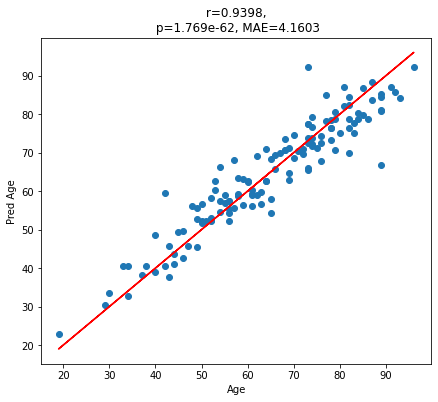

In [50]:
# make scatterplot of age v. OLS age prediction and plot the BLP  
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

plt.title(' r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Try to make OLS regression out of those ever removed
Here we Create an OLS regression with original Clock CpGs in the "ever removed" group

In [51]:
#Create a Table of Betas for CpGs which are in the "never removed" group
ever_removed_Betas = hannum_test.T.iloc[ever_lost_df.index]
ever_removed_Betas = ever_removed_Betas.T
ever_removed_Betas

CpG,cg07553761,cg06784991,cg14692377,cg01974375,cg16054275,cg02650266,cg08128734,cg22796704,cg17110586,cg03431918,...,cg11399576,cg13950210,cg15558448,cg23546750,cg17614564,cg03976326,cg09069072,cg11327565,ch.11.110310046R,cg02575092
GSM989827,0.302952,0.274530,0.188130,0.195395,0.434475,0.101353,0.638239,0.471578,0.337763,0.146197,...,0.889900,0.016414,0.928599,0.870213,0.004328,0.967619,0.833831,0.933791,0.026769,0.286758
GSM989828,0.410273,0.320813,0.242717,0.179397,0.343974,0.196602,0.444113,0.514597,0.327493,0.119777,...,0.866786,0.005533,0.917315,0.869778,0.001919,0.964842,0.793672,0.963487,0.022496,0.376585
GSM989829,0.350735,0.275572,0.229288,0.186674,0.448740,0.152561,0.365440,0.498792,0.335900,0.150507,...,0.887454,0.003379,0.924789,0.857832,0.003627,0.964998,0.663373,0.906825,0.021725,0.273591
GSM989830,0.369583,0.327622,0.187732,0.194213,0.409806,0.122935,0.513427,0.581712,0.320397,0.139093,...,0.869603,0.006550,0.899308,0.858848,0.006905,0.967001,0.776452,0.893576,0.022068,0.271444
GSM989831,0.339236,0.295334,0.193840,0.210861,0.377789,0.067517,0.411685,0.456400,0.306509,0.111039,...,0.883511,0.001869,0.899558,0.876517,0.000000,0.968805,0.892856,0.963562,0.011955,0.308773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.388654,0.296899,0.222813,0.219799,0.400184,0.163467,0.504973,0.483860,0.353433,0.153317,...,0.877473,0.003994,0.952811,0.902066,0.000000,0.988699,0.899449,0.946780,0.006809,0.358330
GSM990624,0.337741,0.264163,0.166631,0.176929,0.435979,0.168038,0.550195,0.502375,0.354314,0.155591,...,0.882431,0.000962,0.921999,0.891824,0.000000,0.971452,0.815775,0.972561,0.051089,0.416733
GSM990625,0.308657,0.285705,0.184034,0.218508,0.361984,0.120845,0.359239,0.421790,0.401855,0.116398,...,0.878708,0.005587,0.940430,0.896510,0.000000,0.982922,0.709125,0.973918,0.008158,0.312875
GSM990626,0.347992,0.331572,0.201562,0.231296,0.378819,0.160801,0.444925,0.561604,0.347183,0.148519,...,0.902959,0.004243,0.930871,0.900020,0.000000,0.972010,0.855875,0.959900,0.046431,0.251088


In [52]:
#Split the dataset into training and test subsets 
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(ever_removed_Betas, ages, test_size=0.2, random_state=42)


In [53]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [54]:
#Read in age training data as a list
Y_train=age_train.values.ravel()


In [55]:
#Create a Linear Regression using all available cores
OLS = LinearRegression(n_jobs= -1)

In [56]:
#Fit the OLS to the Beta and Age training datas
OLS.fit(methyl_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [57]:
#Make predictions on test set data
Y_test=age_test.values.ravel()
preds = OLS.predict(methyl_test)

In [58]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

5.12362713353651
0.9059712175099456


Text(0.5, 1.0, ' r=0.9060, \n p=2.269e-50, MAE=5.1236')

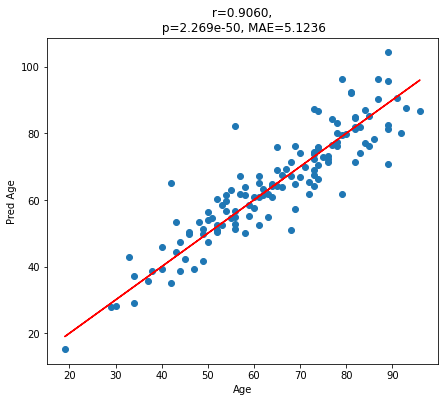

In [59]:
# make scatterplot of age v. OLS age prediction and plot the BLP   
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

plt.title(' r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Try to make OLS regression With all original Clock CpGs
Here we Create an OLS regression with all original Clock CpGs 

In [60]:
#Create a Table of Betas for Clock CpGs
clock_Betas = hannum_test.T.iloc[coeff_test.index]
clock_Betas = clock_Betas.T
clock_Betas

CpG,cg16867657,cg10501210,cg08097417,cg14361627,cg06639320,cg26290632,cg09809672,cg22454769,cg00748589,cg21572722,...,cg10936841,cg24268035,cg09499629,cg00753924,cg12606694,cg10665390,cg13327545,cg20973931,cg18568843,cg24674445
GSM989827,0.651194,0.418132,0.199855,0.232643,0.467484,0.197472,0.369564,0.563600,0.282214,0.396256,...,0.660338,0.988824,0.104279,0.384278,0.055492,0.396573,0.447978,0.241465,0.177216,0.103816
GSM989828,0.751090,0.194307,0.235492,0.263434,0.554684,0.244319,0.339658,0.704345,0.269135,0.471684,...,0.636714,0.964623,0.128902,0.359200,0.054019,0.405113,0.432550,0.171920,0.112879,0.104005
GSM989829,0.672077,0.417227,0.180144,0.237633,0.497623,0.235976,0.349924,0.605543,0.281807,0.433398,...,0.654773,0.988127,0.106410,0.361743,0.062709,0.402255,0.493759,0.244913,0.146270,0.115089
GSM989830,0.684481,0.636075,0.223053,0.243768,0.495958,0.221492,0.333596,0.628087,0.293646,0.433006,...,0.681870,0.976357,0.112476,0.356434,0.062225,0.419719,0.492035,0.255133,0.123529,0.052419
GSM989831,0.664573,0.394391,0.186741,0.235196,0.474316,0.222447,0.360263,0.560501,0.273774,0.420811,...,0.646879,0.960741,0.086558,0.364902,0.062117,0.407598,0.446932,0.262333,0.150499,0.097646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.686430,0.489399,0.278703,0.337654,0.514021,0.270357,0.464541,0.635131,0.335834,0.460112,...,0.684166,0.983731,0.166475,0.415635,0.071376,0.475308,0.511996,0.243845,0.158071,0.122110
GSM990624,0.689411,0.381109,0.265860,0.356676,0.422123,0.228231,0.377446,0.501879,0.315327,0.449844,...,0.757318,0.941740,0.144737,0.350142,0.060549,0.376871,0.475916,0.259278,0.170841,0.112385
GSM990625,0.680086,0.355581,0.213981,0.244098,0.469335,0.244030,0.369136,0.536361,0.310188,0.455705,...,0.752075,0.970431,0.113519,0.470459,0.065648,0.417045,0.431268,0.255259,0.147558,0.095444
GSM990626,0.697690,0.513889,0.240067,0.251544,0.489239,0.159305,0.521859,0.559860,0.326913,0.491282,...,0.638436,0.969068,0.115249,0.374986,0.058293,0.429100,0.476604,0.292988,0.138834,0.136397


In [61]:
#Split the dataset into training and test subsets 
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(clock_Betas, ages, test_size=0.2, random_state=42)


In [62]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [63]:
#Read in age training data as a list
Y_train=age_train.values.ravel()


In [64]:
#Create a Linear Regression using all available cores
OLS = LinearRegression(n_jobs= -1)

In [65]:
#Fit the OLS to the Beta and Age training datas
OLS.fit(methyl_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [66]:
#Make predictions on test set data
Y_test=age_test.values.ravel()
preds = OLS.predict(methyl_test)

In [67]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

3.828471746531233
0.9480506200285569


In [68]:
#create list to save ploted values for Figures ---C and ---D
predsL = []
Y_testL = []
predL = []
rvalueL = []
pvalueL = []
maeL =[]

Text(0.5, 1.0, 'Hannum Set Clock CpGs OLS \n r=0.9481, \n p=1.598e-66, MAE=3.8285')

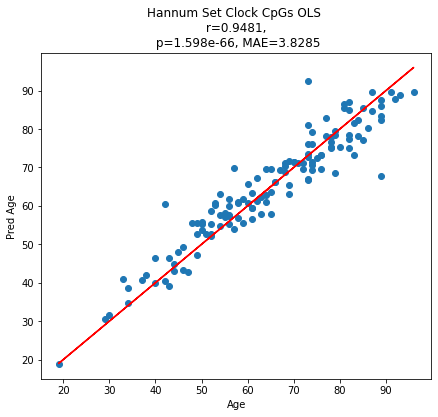

In [69]:
# make scatterplot of age v. OLS age prediction and plot the BLP   
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt1 = plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

#Save the values of interest for our Figures
predsL.append(preds)
Y_testL.append(Y_test)
predL.append(pred)
rvalueL.append(rvalue)
pvalueL.append(pvalue)
maeL.append(mae)

plt.title('Hannum Set Clock CpGs OLS \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Now We perform a similiar test with the Original Elastic Net model

In [70]:
#Split the whole dataset into training and test subsets 
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(hannum_test, ages, test_size=0.2, random_state=42)

In [71]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [72]:
#Read in age training data as a list
Y_train=age_train.values.ravel()


In [73]:
#Make predictions on test set data

Y_test=age_test.values.ravel()
preds = elastic_netCV_original.predict(methyl_test)

In [74]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

3.7380923576280893
0.9509576023526032


Text(0.5, 1.0, ' Hannum Set Elastic Net \n r=0.9510, \n p=4.158e-68, MAE=3.7381')

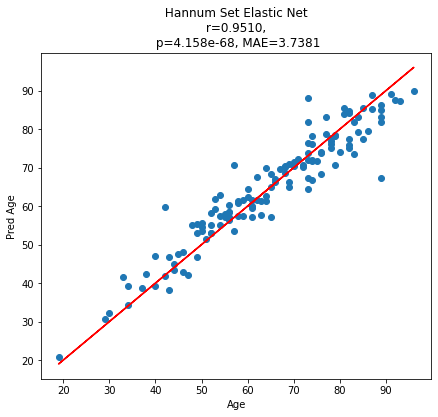

In [75]:
# make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

#Save the values of interest for our Figures
predsL.append(preds)
Y_testL.append(Y_test)
predL.append(pred)
rvalueL.append(rvalue)
pvalueL.append(pvalue)
maeL.append(mae)

plt.title(' Hannum Set Elastic Net \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Try with clock CpGs from 30% Removed

In [76]:
#Load in the EN model and dataset with 30% of non-clock CpGs removed
enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_30_i5000.joblib')
dataset =  pd.read_pickle(parent + '/Trained_Models/hannum_30% nonsig removed.pkl')

#Find the Significant coeffiecients 
coeffs_set = pd.DataFrame(enet.coef_)
coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})

In [77]:
#Create a Table of Betas for 30% Removed Clock CpGs
clock30_Betas = dataset.T.iloc[coeffs_set.index]
clock30_Betas = clock30_Betas.T
clock30_Betas

CpG,cg00042478,cg00047050,cg00055986,cg00058879,cg00095728,cg00120464,cg00123072,cg00147095,cg00240875,cg00281129,...,cg27506082,cg27513225,cg27662246,ch.11.110310046R,ch.11.315572F,ch.11.319992F,ch.19.1716179R,ch.4.60646130F,ch.5.67026991F,ch.6.2574971F
GSM989827,0.988354,0.155244,0.267208,0.180338,0.133575,0.927025,0.877821,0.903417,0.910151,0.922840,...,0.027434,0.910239,0.878847,0.026769,0.202250,0.045334,0.092257,0.026170,0.032671,0.008833
GSM989828,0.965200,0.113820,0.297573,0.174198,0.141269,0.932776,0.924583,0.894709,0.897605,0.933906,...,0.021614,0.933796,0.862047,0.022496,0.048027,0.048654,0.075512,0.041567,0.036647,0.020213
GSM989829,0.956607,0.132763,0.354057,0.175213,0.144154,0.900056,0.912706,0.913837,0.900857,0.931744,...,0.028287,0.925709,0.887271,0.021725,0.128649,0.052640,0.077525,0.037895,0.041387,0.019721
GSM989830,0.917381,0.143769,0.269180,0.132281,0.110536,0.876115,0.890417,0.910409,0.912799,0.903954,...,0.027812,0.910398,0.883088,0.022068,0.103743,0.030235,0.101558,0.028206,0.025492,0.034047
GSM989831,0.948417,0.151902,0.321703,0.204761,0.143444,0.914204,0.869289,0.924081,0.889171,0.925779,...,0.040365,0.917629,0.871559,0.011955,0.258040,0.050334,0.083336,0.036823,0.040534,0.032085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.986848,0.140337,0.328201,0.264072,0.161009,0.918653,0.942336,0.885582,0.913129,0.966526,...,0.031269,0.951874,0.888363,0.006809,0.083340,0.056778,0.095607,0.024050,0.042340,0.040195
GSM990624,0.942068,0.099530,0.331531,0.239304,0.162188,0.900308,0.979489,0.894580,0.909750,0.950184,...,0.028993,0.933689,0.904370,0.051089,0.084007,0.012430,0.064258,0.034127,0.054531,0.031378
GSM990625,0.987954,0.104357,0.517700,0.174299,0.139964,0.890416,0.869857,0.894150,0.929059,0.935472,...,0.012868,0.934117,0.890609,0.008158,0.030281,0.000000,0.090461,0.021934,0.037112,0.008924
GSM990626,0.965633,0.132477,0.222999,0.234759,0.151202,0.947308,0.904380,0.925214,0.950009,0.949358,...,0.020079,0.944128,0.901227,0.046431,0.019310,0.013961,0.099772,0.030709,0.037449,0.031022


In [78]:
#Split the dataset into training and test subsets 
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(clock30_Betas, ages, test_size=0.2, random_state=42)


In [79]:
#pull scaling from other notebook
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [80]:
#Read in age training data as a list
Y_train=age_train.values.ravel()

In [81]:
#Create a Linear Regression using all available cores
OLS = LinearRegression(n_jobs= 10)

In [82]:
#Fit the OLS to the Beta and Age training datas
OLS.fit(methyl_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [83]:
#Make predictions on test set data
Y_test=age_test.values.ravel()
preds = OLS.predict(methyl_test)

In [84]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

3.7933095862348054
0.9482779204162199


Text(0.5, 1.0, '30% Nonsignificant Removed Set Clock CpGs OLS \n r=0.9483, \n p=1.211e-66, MAE=3.7933')

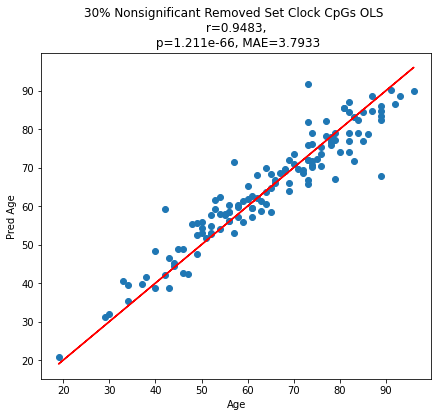

In [85]:
# make scatterplot of age v. OLS age prediction and plot the BLP   
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt3 = plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

#Save the values of interest for our Figures
predsL.append(preds)
Y_testL.append(Y_test)
predL.append(pred)
rvalueL.append(rvalue)
pvalueL.append(pvalue)
maeL.append(mae)

plt.title('30% Nonsignificant Removed Set Clock CpGs OLS \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Now We perform a similiar test with the 30% Removed Elastic Net model

In [86]:
#Split the whole dataset into training and test subsets 
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(dataset, ages, test_size=0.2, random_state=42)

In [87]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [88]:
#Read in age training data as a list
Y_train=age_train.values.ravel()

In [89]:
#Make predictions on test set data
Y_test=age_test.values.ravel()
preds = enet.predict(methyl_test)

In [90]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

3.811237764699828
0.9479248669236474


Text(0.5, 1.0, '30% Nonsignificant Removed Set Elastic Net \n r=0.9479, \n p=1.863e-66, MAE=3.8112')

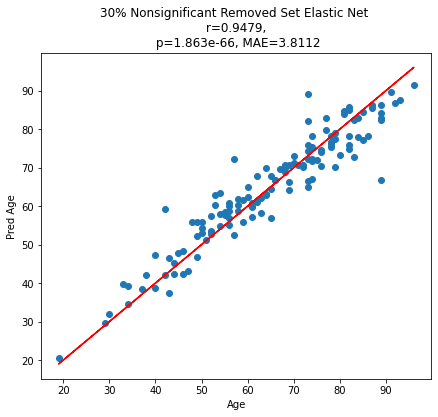

In [91]:
#make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt4 = plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(Y_test, Y_test, color='red')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)

predsL.append(preds)
Y_testL.append(Y_test)
predL.append(pred)
rvalueL.append(rvalue)
pvalueL.append(pvalue)
maeL.append(mae)

plt.title('30% Nonsignificant Removed Set Elastic Net \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# Create figure 4D

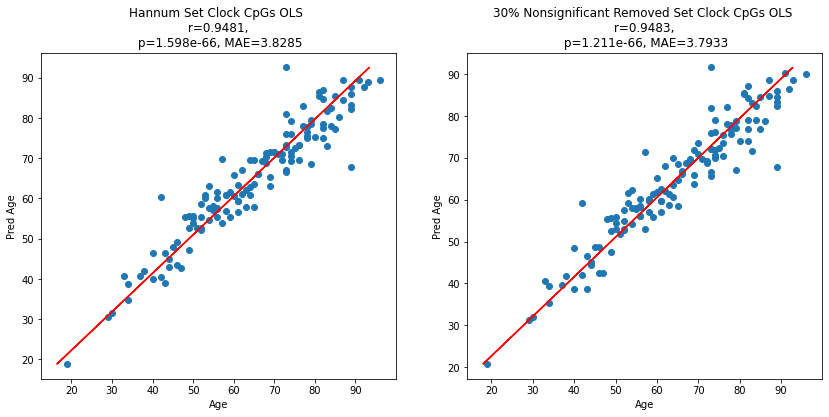

In [92]:
#Generate the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Create the plot for OLS of the original Clock CpGs
ax1.scatter(Y_testL[0], predsL[0])
ax1.plot(predL[0], predsL[0], color='red')
ax1.set_xlabel('Age')
ax1.set_ylabel('Pred Age')
ax1.set_title('Hannum Set Clock CpGs OLS \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalueL[0], pvalueL[0], maeL[0]))

#Create the plot for OLS of the Clock CpGs from the set where 30% of non-sig CpGs are removed
ax2.scatter(Y_testL[2], predsL[2])
ax2.plot(predL[2], predsL[2], color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('Pred Age')
ax2.set_title('30% Nonsignificant Removed Set Clock CpGs OLS \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalueL[2], pvalueL[2], maeL[2]))

#Save the figure
plt.savefig("Fig6_C")

# Create figure 4C

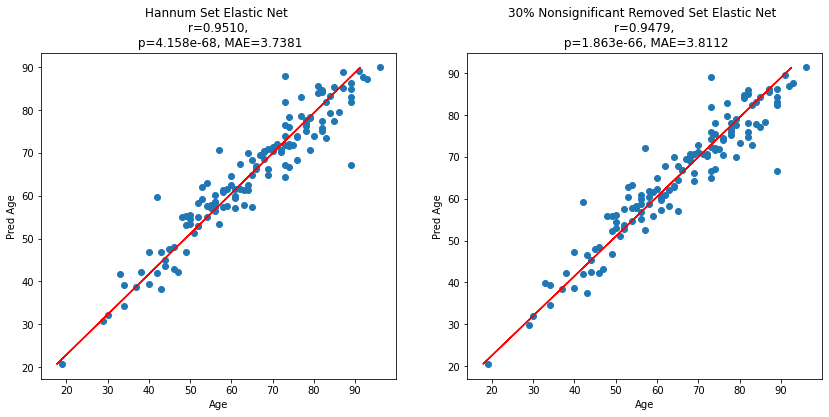

In [93]:
#Generate the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Create the plot for EN of the original Clock CpGs
ax1.scatter(Y_testL[1], predsL[1])
ax1.plot(predL[1], predsL[1], color='red')
ax1.set_xlabel('Age')
ax1.set_ylabel('Pred Age')
ax1.set_title('Hannum Set Elastic Net \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalueL[1], pvalueL[1], maeL[1]))

#Create the plot for EN of the Clock CpGs from the set where 30% of non-sig CpGs are removed
ax2.scatter(Y_testL[3], predsL[3])
ax2.plot(predL[3], predsL[3], color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('Pred Age')
ax2.set_title('30% Nonsignificant Removed Set Elastic Net \n r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalueL[3], pvalueL[3], maeL[3]))

#Save the figure
plt.savefig("Fig6_D")

# Now we wish to Calculate the % of Novel Clock CpGs in each model
We have trained Elastic Net models on Data sets with 1-10% of non-clock CpGs removed in 1% intervals and on datasets with 10-100% of non-clock CpGs removed in 10% intervals. Here we find novel Clock CpGs, meaning they are Clock CpGs in the new Elastic Net model and not in the original Elastic Net Model, the percentage of Clock CpGs they make up, and the percentage of original Clock CpGs which are non Clock CpGs in the new models. We then plot our results

In [94]:
#Create lists to save quantaties of interest for figures ---A and ---
spaceL = []
percent_diffL = []
percent_lostL = []

In [ ]:
#an example of the analysis which generate the data for part of figure 3A

#Here we load models with 1-10% of Nonsig removed and find the desired quantities
for i in range(1, 11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    
    #find clock CpGs similiar between the original clock and the new dataset
    common = intersection(sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list())
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(sig_cpgs_set["CpG"].to_list())) + " Clock CpGs.")
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(common)) + " Clock CpGs in common with the original EN")
    
    #find clock CpGs from the original Clock not included in the new set
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    print("The model with " + str(i) + " % of nonsig CpGs removed does not use " + str(len(lost_cpg)) + " of the Clock CpGs in the original model")
    

In [95]:
#Define lists to find the percentage of Novel CpGs and percent of Original Clock CpGs Unused
percent_diff = [0]
percent_lost = [0]

#Here we load models with 1-10% of Nonsig removed and find the desired quantities
for i in range(1, 11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    
    #find clock CpGs similiar between the original clock and the new dataset
    common = intersection(sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list())
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(sig_cpgs_set["CpG"].to_list())) + " Clock CpGs.")
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(common)) + " Clock CpGs in common with the original EN")
    
    #find clock CpGs from the original Clock not included in the new set
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    print("The model with " + str(i) + " % of nonsig CpGs removed does not use " + str(len(lost_cpg)) + " of the Clock CpGs in the original model")
    
    #Append the found value to the list for plotting
    percent_diff.append(100*((len(sig_cpgs_set["CpG"].to_list()) - len(common))/(len(sig_cpgs_set["CpG"].to_list()))))
    percent_lost.append(100*len(lost_cpg)/len(sig_cpgs_original["CpG"].to_list()))
    

The model with 1 % of nonsig CpGs removed has 867 Clock CpGs.
The model with 1 % of nonsig CpGs removed has 830 Clock CpGs in common with the original EN
The model with 1 % of nonsig CpGs removed does not use 17 of the Clock CpGs in the original model
The model with 2 % of nonsig CpGs removed has 882 Clock CpGs.
The model with 2 % of nonsig CpGs removed has 827 Clock CpGs in common with the original EN
The model with 2 % of nonsig CpGs removed does not use 20 of the Clock CpGs in the original model
The model with 3 % of nonsig CpGs removed has 869 Clock CpGs.
The model with 3 % of nonsig CpGs removed has 834 Clock CpGs in common with the original EN
The model with 3 % of nonsig CpGs removed does not use 13 of the Clock CpGs in the original model
The model with 4 % of nonsig CpGs removed has 869 Clock CpGs.
The model with 4 % of nonsig CpGs removed has 832 Clock CpGs in common with the original EN
The model with 4 % of nonsig CpGs removed does not use 15 of the Clock CpGs in the origina

In [96]:
#Generate a list to correspond to the % of nonsig removed for plotting purposes
space = [i for i in range(0, 11)]
space

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

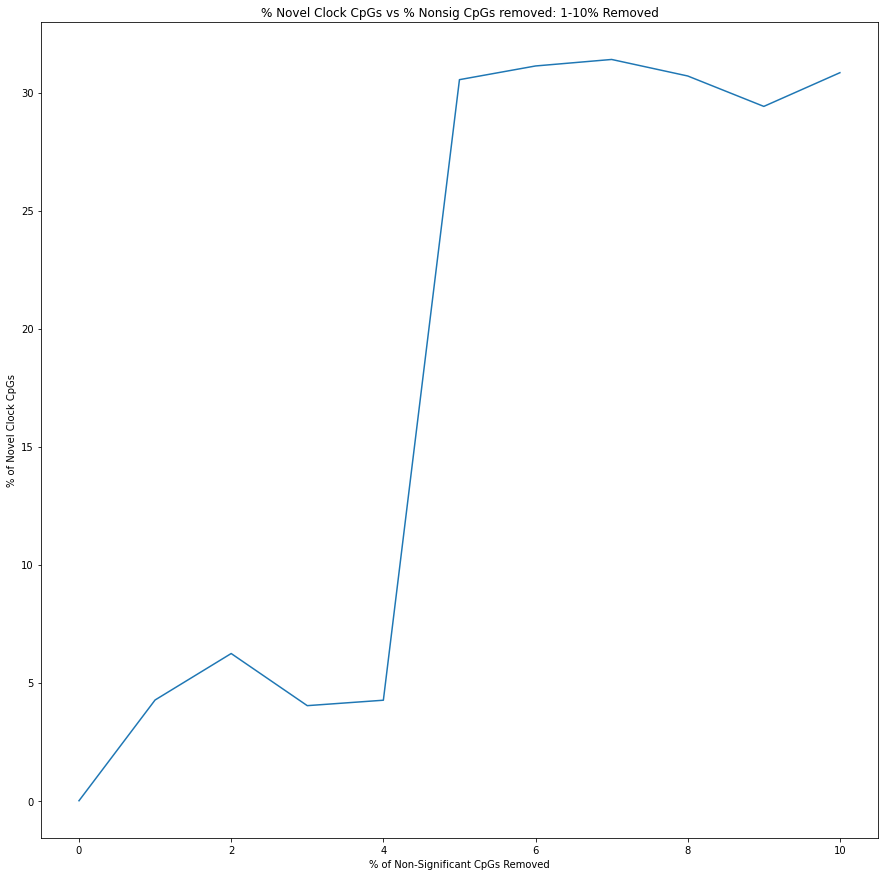

In [97]:
#Plot the Novel Clock CpGs vs the percent of nonsig CpGs removed
plt.figure(figsize=(15, 15))
plt.title("% Novel Clock CpGs vs % Nonsig CpGs removed: 1-10% Removed")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("% of Novel Clock CpGs")
plt.plot(space, percent_diff )

In [98]:
#Save the quantaties to be ploted in figure ---A and ---
spaceL.append(space)
percent_diffL.append(percent_diff)
percent_lostL.append(percent_lost)

In [99]:
#Define lists to find the percentage of Novel CpGs and percent of Original Clock CpGs Unused
percent_diff = [0]
percent_lost = [0]

#Here we load models with 10-100% of Nonsig removed and find the desired quantities
for i in range(10, 110, 10):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    
    #find clock CpGs similiar between the original clock and the new dataset
    common = intersection(sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list())
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(sig_cpgs_set["CpG"].to_list())) + " Clock CpGs.")
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(common)) + " Clock CpGs in common with the original EN")
    
    #find clock CpGs from the original Clock not included in the new set
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    print("The model with " + str(i) + " % of nonsig CpGs removed does not use " + str(len(lost_cpg)) + " of the Clock CpGs in the original model")
    
    #Append the found value to the list for plotting
    percent_diff.append(100*((len(sig_cpgs_set["CpG"].to_list()) - len(common))/(len(sig_cpgs_set["CpG"].to_list()))))
    percent_lost.append(100*len(lost_cpg)/len(sig_cpgs_original["CpG"].to_list()))
    

The model with 10 % of nonsig CpGs removed has 989 Clock CpGs.
The model with 10 % of nonsig CpGs removed has 684 Clock CpGs in common with the original EN
The model with 10 % of nonsig CpGs removed does not use 163 of the Clock CpGs in the original model
The model with 20 % of nonsig CpGs removed has 947 Clock CpGs.
The model with 20 % of nonsig CpGs removed has 702 Clock CpGs in common with the original EN
The model with 20 % of nonsig CpGs removed does not use 145 of the Clock CpGs in the original model
The model with 30 % of nonsig CpGs removed has 932 Clock CpGs.
The model with 30 % of nonsig CpGs removed has 691 Clock CpGs in common with the original EN
The model with 30 % of nonsig CpGs removed does not use 156 of the Clock CpGs in the original model
The model with 40 % of nonsig CpGs removed has 915 Clock CpGs.
The model with 40 % of nonsig CpGs removed has 704 Clock CpGs in common with the original EN
The model with 40 % of nonsig CpGs removed does not use 143 of the Clock CpG

In [100]:
#Generate a list to correspond to the % of nonsig removed for plotting purposes
space = [i for i in range(0, 110, 10)]
space

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

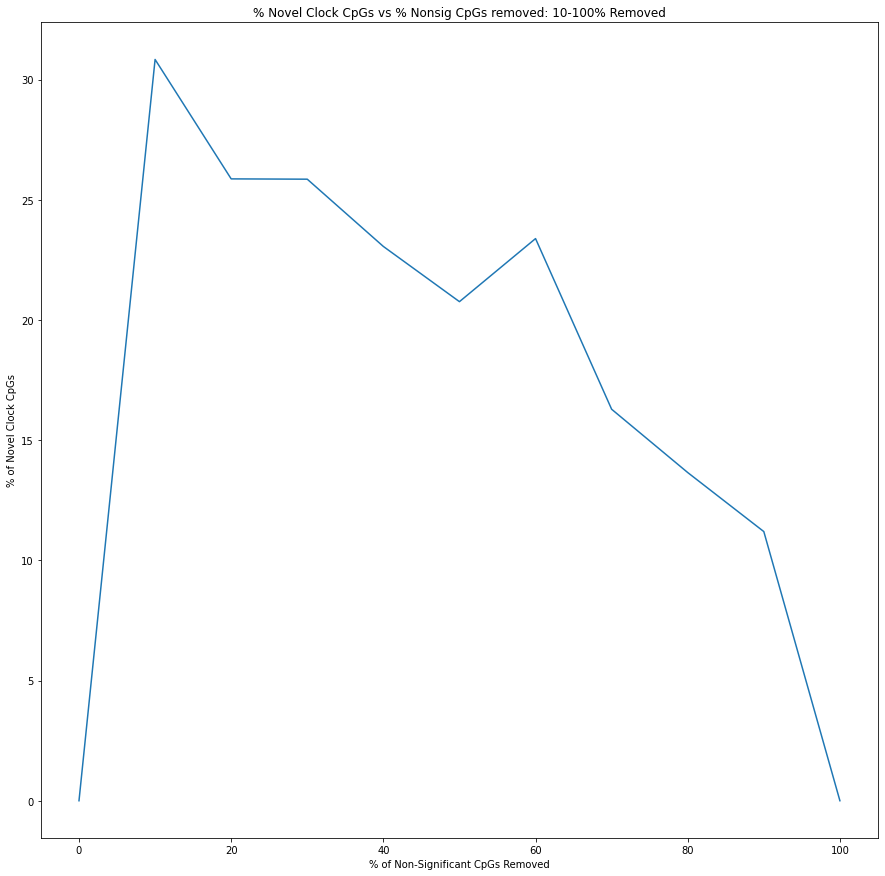

In [101]:
#Plot the Novel Clock CpGs vs the percent of nonsig CpGs removed
plt.figure(figsize=(15, 15))
plt.title("% Novel Clock CpGs vs % Nonsig CpGs removed: 10-100% Removed")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("% of Novel Clock CpGs")
plt.plot(space, percent_diff )

In [102]:
#Save the quantaties to be ploted later
spaceL.append(space)
percent_diffL.append(percent_diff)
percent_lostL.append(percent_lost)

# Create Figure 

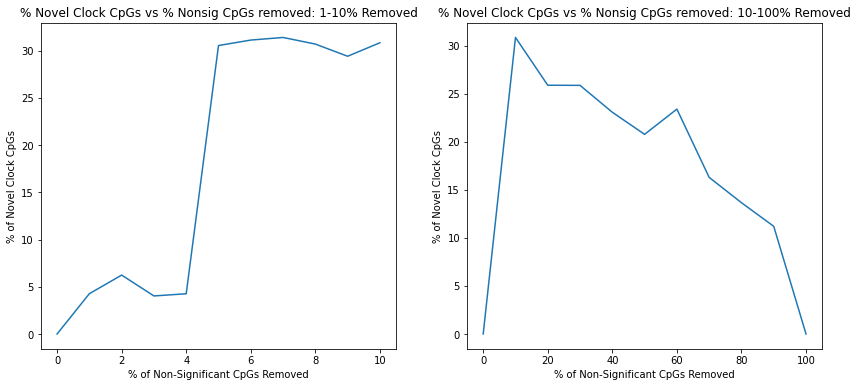

In [103]:
#Create the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Plot the Novel CpGs from models with 1-10% of nonsig CpGs removed
ax1.plot(spaceL[0], percent_diffL[0] )
ax1.set_xlabel("% of Non-Significant CpGs Removed")
ax1.set_ylabel("% of Novel Clock CpGs")
ax1.set_title("% Novel Clock CpGs vs % Nonsig CpGs removed: 1-10% Removed")

#Plot the Novel CpGs from models with 10-100% of nonsig CpGs removed
ax2.plot(spaceL[1], percent_diffL[1] )
ax2.set_xlabel("% of Non-Significant CpGs Removed")
ax2.set_ylabel("% of Novel Clock CpGs")
ax2.set_title("% Novel Clock CpGs vs % Nonsig CpGs removed: 10-100% Removed")

#Save the Figure
plt.savefig("Fig6_A1")

# Create Figure 4A

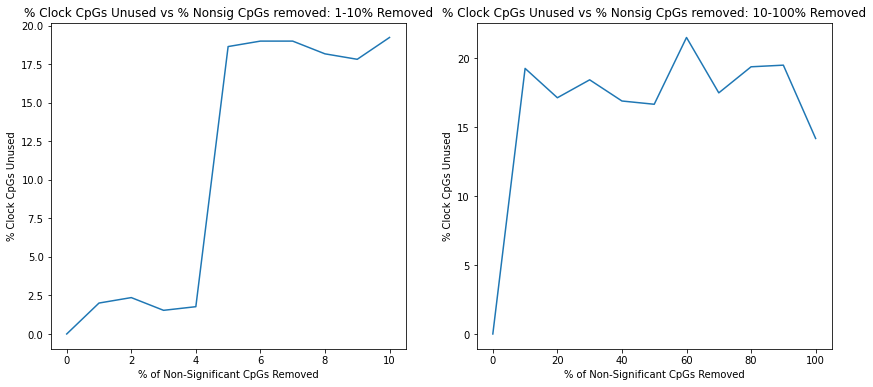

In [104]:
#Create the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Plot the Lost CpGs from models with 1-10% of nonsig CpGs removed
ax1.plot(spaceL[0], percent_lostL[0] )
ax1.set_xlabel("% of Non-Significant CpGs Removed")
ax1.set_ylabel("% Clock CpGs Unused")
ax1.set_title("% Clock CpGs Unused vs % Nonsig CpGs removed: 1-10% Removed")

#Plot the Lost CpGs from models with 10-100% of nonsig CpGs removed
ax2.plot(spaceL[1], percent_lostL[1] )
ax2.set_xlabel("% of Non-Significant CpGs Removed")
ax2.set_ylabel("% Clock CpGs Unused")
ax2.set_title("% Clock CpGs Unused vs % Nonsig CpGs removed: 10-100% Removed")

#Save the Figure
plt.savefig("Fig6_A2")

# Find Percent of DeepmAge CpGs used
Here we find Clock CpGs which are also DeepmAge selected CpGs in each EN model analysed, the percent of DeepmAge CpGs which are Clock CpGs in each model, and the percentage of CpGs which are Original Clock CpGs and DeepmAge CpGs, which are non selected as Clock CpGs in the new EN model.

In [105]:
#Create List to save values to be plotted
space_mAgeL = []
percent_mAgeL = []
percent_lost_mAgeL = []

In [106]:
#Define lists to find the percentage of DeepmAge CpGs and percent of Original DeepmAge Clock CpGs Unused
percent_mAge = [100*len(mAge_CrossOver["CpG"].to_list())/len(mAge_CpGs.index.to_list())]
percent_lost_mAge = [0]

#Here we load models with 1-10% of Nonsig removed and find the desired quantities
for i in range(1, 11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    
    #find Clock Cpgs which are also in DeepmAge
    common = intersection(mAge_CpGs.index.to_list(), sig_cpgs_set["CpG"].to_list())
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(sig_cpgs_set["CpG"].to_list())) + " Clock CpGs.")
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(common)) + " Clock CpGs in common with DeepmAge")
    
    #find mage CpGs in original clocks which are dropped
    lost_cpg = loss(mAge_CrossOver["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    print("The model with " + str(i) + " % of nonsig CpGs removed does not use " + str(len(lost_cpg)) + " of the DeepmAge CpGs which are Clock CpGs in the original model")
    
    #Append the found value to the list for plotting
          
    #percent of mAge Cpgs which are clock Cpgs
    percent_mAge.append(100*(1-((len(mAge_CpGs.index.to_list()) - len(common))/(len(mAge_CpGs.index.to_list())))))
    
    #percent of Mage CpGs in the original Clockset which were Dropped
    percent_lost_mAge.append(100*len(lost_cpg)/len(mAge_CrossOver["CpG"].to_list()))
    

The model with 1 % of nonsig CpGs removed has 867 Clock CpGs.
The model with 1 % of nonsig CpGs removed has 18 Clock CpGs in common with DeepmAge
The model with 1 % of nonsig CpGs removed does not use 0 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 2 % of nonsig CpGs removed has 882 Clock CpGs.
The model with 2 % of nonsig CpGs removed has 18 Clock CpGs in common with DeepmAge
The model with 2 % of nonsig CpGs removed does not use 0 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 3 % of nonsig CpGs removed has 869 Clock CpGs.
The model with 3 % of nonsig CpGs removed has 18 Clock CpGs in common with DeepmAge
The model with 3 % of nonsig CpGs removed does not use 0 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 4 % of nonsig CpGs removed has 869 Clock CpGs.
The model with 4 % of nonsig CpGs removed has 17 Clock CpGs in common with DeepmAge
The model with 4 % of nonsig CpGs removed does not us

In [107]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 11)]
space

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

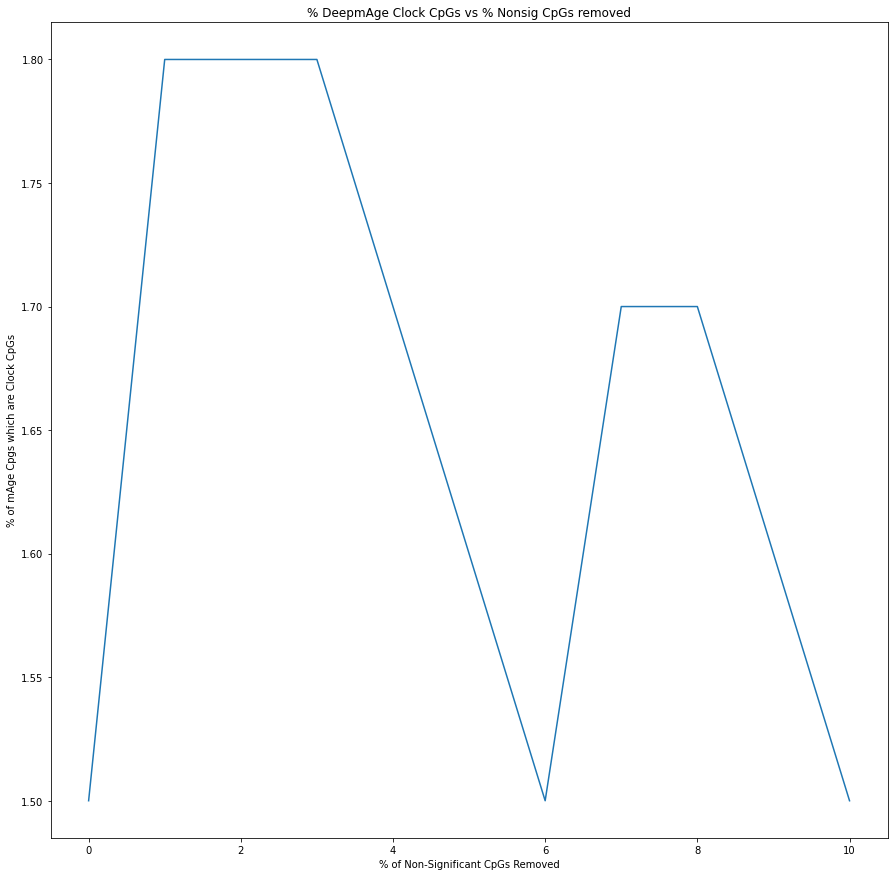

In [108]:
#Plot % of DeepmAge CpGs used vs % nonsig CpGs removed.
plt.figure(figsize=(15, 15))
plt.title("% DeepmAge Clock CpGs vs % Nonsig CpGs removed")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("% of mAge Cpgs which are Clock CpGs")
plt.plot(space, percent_mAge )

In [109]:
#Save the quantities to be saved as Figures
space_mAgeL.append(space)
percent_mAgeL.append(percent_mAge)
percent_lost_mAgeL.append(percent_lost_mAge)

In [110]:
#Define lists to find the percentage of DeepmAge CpGs and percent of Original DeepmAge Clock CpGs Unused
percent_mAge = [100*len(mAge_CrossOver["CpG"].to_list())/len(mAge_CpGs.index.to_list())]
percent_lost_mAge = [0]

#Here we load models with 10-100% of Nonsig removed and find the desired quantities
for i in range(10, 110, 10):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    
    #find Clock Cpgs which are also in DeepmAge
    common = intersection(mAge_CpGs.index.to_list(), sig_cpgs_set["CpG"].to_list())
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(sig_cpgs_set["CpG"].to_list())) + " Clock CpGs.")
    print("The model with " + str(i) + " % of nonsig CpGs removed has " + str(len(common)) + " Clock CpGs in common with DeepmAge")
    
    #find mage CpGs in original clocks which are dropped
    lost_cpg = loss(mAge_CrossOver["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    print("The model with " + str(i) + " % of nonsig CpGs removed does not use " + str(len(lost_cpg)) + " of the DeepmAge CpGs which are Clock CpGs in the original model")
    
    #Append the found value to the list for plotting
          
    #percent of mAge Cpgs which are clock Cpgs
    percent_mAge.append(100*(1-((len(mAge_CpGs.index.to_list()) - len(common))/(len(mAge_CpGs.index.to_list())))))
    
    #percent of Mage CpGs in the original Clockset which were Dropped
    percent_lost_mAge.append(100*len(lost_cpg)/len(mAge_CrossOver["CpG"].to_list()))
       

The model with 10 % of nonsig CpGs removed has 989 Clock CpGs.
The model with 10 % of nonsig CpGs removed has 15 Clock CpGs in common with DeepmAge
The model with 10 % of nonsig CpGs removed does not use 6 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 20 % of nonsig CpGs removed has 947 Clock CpGs.
The model with 20 % of nonsig CpGs removed has 17 Clock CpGs in common with DeepmAge
The model with 20 % of nonsig CpGs removed does not use 5 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 30 % of nonsig CpGs removed has 932 Clock CpGs.
The model with 30 % of nonsig CpGs removed has 18 Clock CpGs in common with DeepmAge
The model with 30 % of nonsig CpGs removed does not use 5 of the DeepmAge CpGs which are Clock CpGs in the original model
The model with 40 % of nonsig CpGs removed has 915 Clock CpGs.
The model with 40 % of nonsig CpGs removed has 19 Clock CpGs in common with DeepmAge
The model with 40 % of nonsig CpGs removed

In [111]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 110, 10)]
space

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

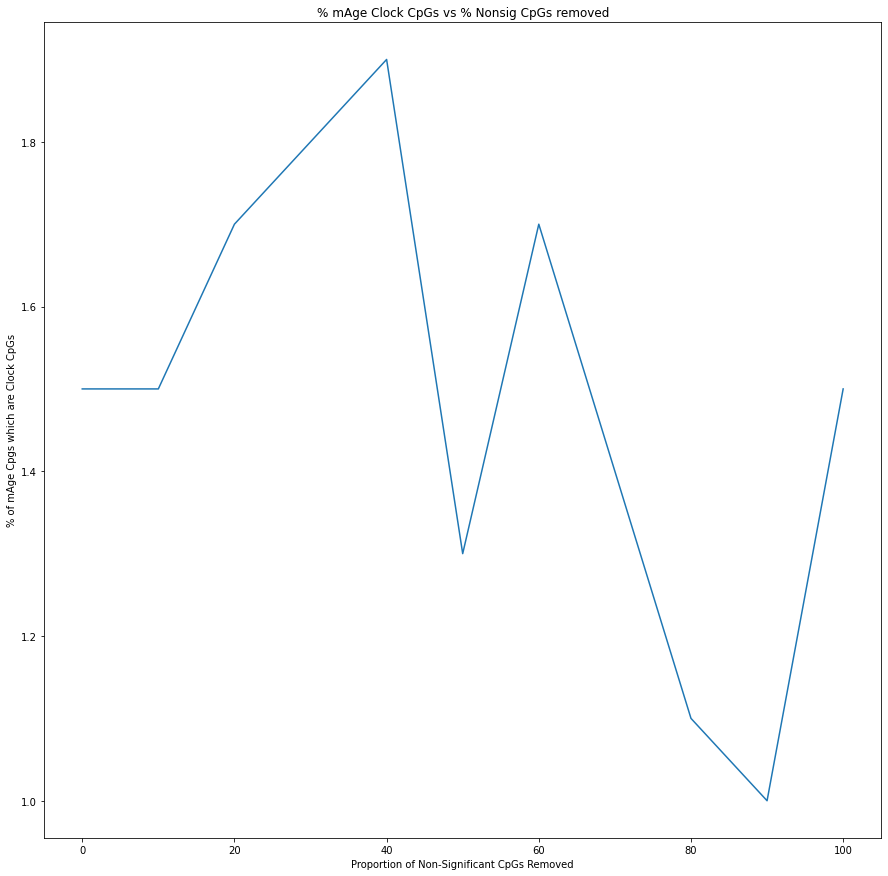

In [112]:
#Plot % of DeepmAge CpGs used vs % nonsig CpGs removed.
plt.figure(figsize=(15, 15))
plt.title("% mAge Clock CpGs vs % Nonsig CpGs removed")
plt.xlabel("Proportion of Non-Significant CpGs Removed")
plt.ylabel("% of mAge Cpgs which are Clock CpGs")
plt.plot(space, percent_mAge )

In [113]:
#Save the quantities to be saved as Figures
space_mAgeL.append(space)
percent_mAgeL.append(percent_mAge)
percent_lost_mAgeL.append(percent_lost_mAge)

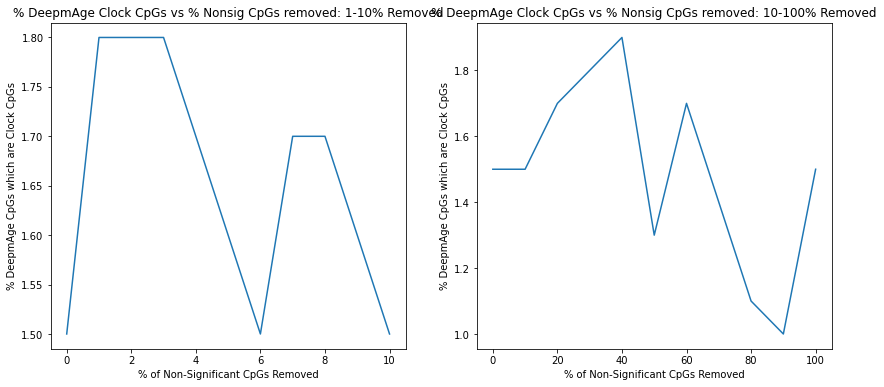

In [114]:
#Create the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Plot the Deepmage CpGs from models with 1-10% of nonsig CpGs removed
ax1.plot(space_mAgeL[0], percent_mAgeL[0] )
ax1.set_xlabel("% of Non-Significant CpGs Removed")
ax1.set_ylabel("% DeepmAge CpGs which are Clock CpGs")
ax1.set_title("% DeepmAge Clock CpGs vs % Nonsig CpGs removed: 1-10% Removed")

#Plot the Deepmage CpGs from models with 10-100% of nonsig CpGs removed
ax2.plot(space_mAgeL[1], percent_mAgeL[1] )
ax2.set_xlabel("% of Non-Significant CpGs Removed")
ax2.set_ylabel("% DeepmAge CpGs which are Clock CpGs")
ax2.set_title("% DeepmAge Clock CpGs vs % Nonsig CpGs removed: 10-100% Removed")

#Save Figure
plt.savefig("Fig7_mAge1")

# Create Figure 4B

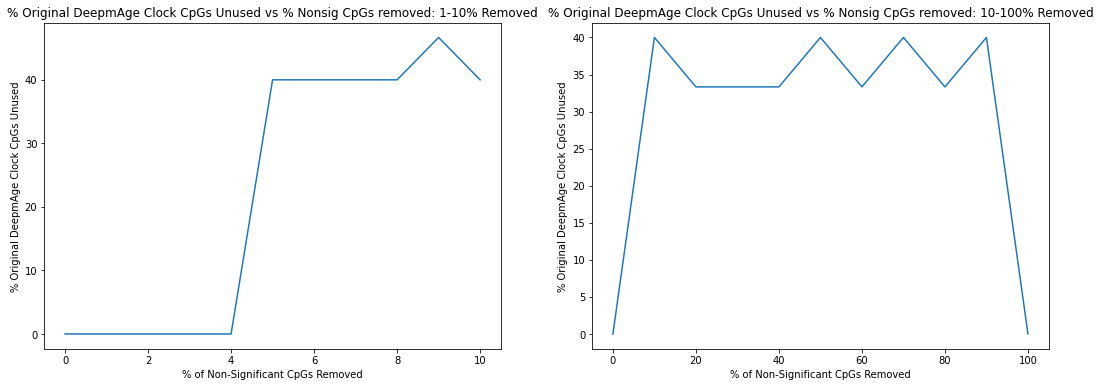

In [115]:
#Create the Figure with two Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

#Plot the original Deepmage CpGs Lost from models with 1-10% of nonsig CpGs removed
ax1.plot(space_mAgeL[0], percent_lost_mAgeL[0] )
ax1.set_xlabel("% of Non-Significant CpGs Removed")
ax1.set_ylabel("% Original DeepmAge Clock CpGs Unused")
ax1.set_title("% Original DeepmAge Clock CpGs Unused vs % Nonsig CpGs removed: 1-10% Removed")

#Plot the original Deepmage CpGs Lost from models with 10-100% of nonsig CpGs removed
ax2.plot(space_mAgeL[1], percent_lost_mAgeL[1] )
ax2.set_xlabel("% of Non-Significant CpGs Removed")
ax2.set_ylabel("% Original DeepmAge Clock CpGs Unused")
ax2.set_title("% Original DeepmAge Clock CpGs Unused vs % Nonsig CpGs removed: 10-100% Removed")

#Save Figure
plt.savefig("Fig7_mAge2")

# Calculate % of lost CpGs  from each model also found in smallest "lost CpG list" 

In [116]:
#We need to find EN model with the lowest list of "Lost" original CpGs

#Define the dumy variables for the size of the smallest list and the smallest list itself
smallest_size = 1000000
smallest = "none"

#We run this process for EN with 1-10% of nonsig CpGs removed.
for i in range(1,11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #Find the original Clock CpGs which are not in the EN model
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #determine if the Current lost list is smaller than the current smallest list
    if len(lost_cpg) < smallest_size:
        smallest_size = len(lost_cpg)
        smallest = lost_cpg
        
#Print the size of the smallest "lost list"        
print("The smallest size of the 'lost CpGs' list is " + str(smallest_size))

The smallest size of the 'lost CpGs' list is 13


In [117]:
#Find the percent of smallest CpGs which are in each set of Clock CpGs
percent_common_lost = [0]

#We run this process for EN with 1-10% of nonsig CpGs removed.
for i in range(1,11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #Find the original Clock CpGs which are not in the EN model
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #Find the Common CpGs between the smallest lost list and the lost list of the current EN model
    common_lost = intersection(smallest, lost_cpg)
    
    #Find the percent of "Lost CpGs" in the smallest lost list. 
    percent_common_lost.append(len(common_lost)/len(smallest))
    

In [118]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 11)]
space

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

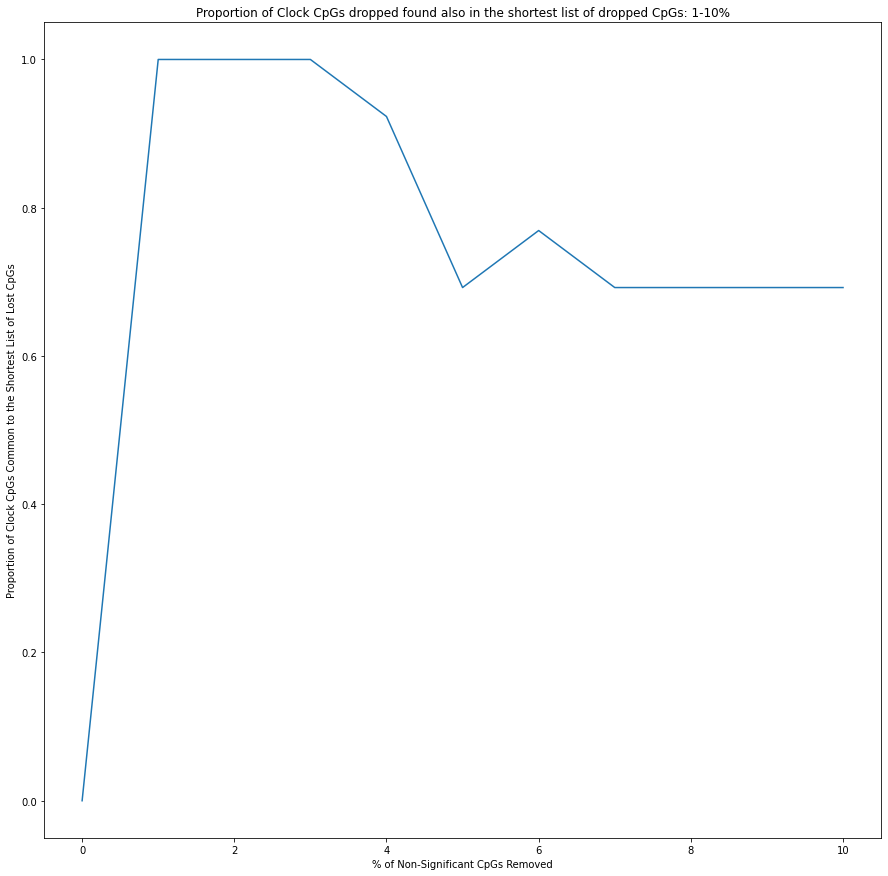

In [119]:
#Plot the percent of "Lost CpGs" which are common to the smallesst lost list
plt.figure(figsize=(15, 15))
plt.title("Proportion of Clock CpGs dropped found also in the shortest list of dropped CpGs: 1-10%")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Proportion of Clock CpGs Common to the Shortest List of Lost CpGs")
plt.plot(space, percent_common_lost )

In [120]:
#We need to find EN model with the lowest list of "Lost" original CpGs

#Define the dumy variables for the size of the smallest list and the smallest list itself
smallest_size = 1000000
smallest = "none"

#We run this process for EN with 10-100% of nonsig CpGs removed.
for i in range(10,110, 10):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #Find the original Clock CpGs which are not in the EN model
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #determine if the Current lost list is smaller than the current smallest list
    if len(lost_cpg) < smallest_size:
        smallest_size = len(lost_cpg)
        smallest = lost_cpg
        
#Print the size of the smallest "lost list"        
print("The smallest size of the 'lost CpGs' list is " + str(smallest_size))

The smallest size of the 'lost CpGs' list is120


In [121]:
#Find the percent of smallest CpGs which are in each set of Clock CpGs
percent_common_lost = [0]

#We run this process for EN with 10-100% of nonsig CpGs removed.
for i in range(10,110, 10):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]
    
    #Find the original Clock CpGs which are not in the EN model
    lost_cpg = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    
    #Find the Common CpGs between the smallest lost list and the lost list of the current EN model
    common_lost = intersection(smallest, lost_cpg)
    
    #Find the percent of "Lost CpGs" in the smallest lost list. 
    percent_common_lost.append(len(common_lost)/len(smallest))
    

In [122]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 110, 10)]
space

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

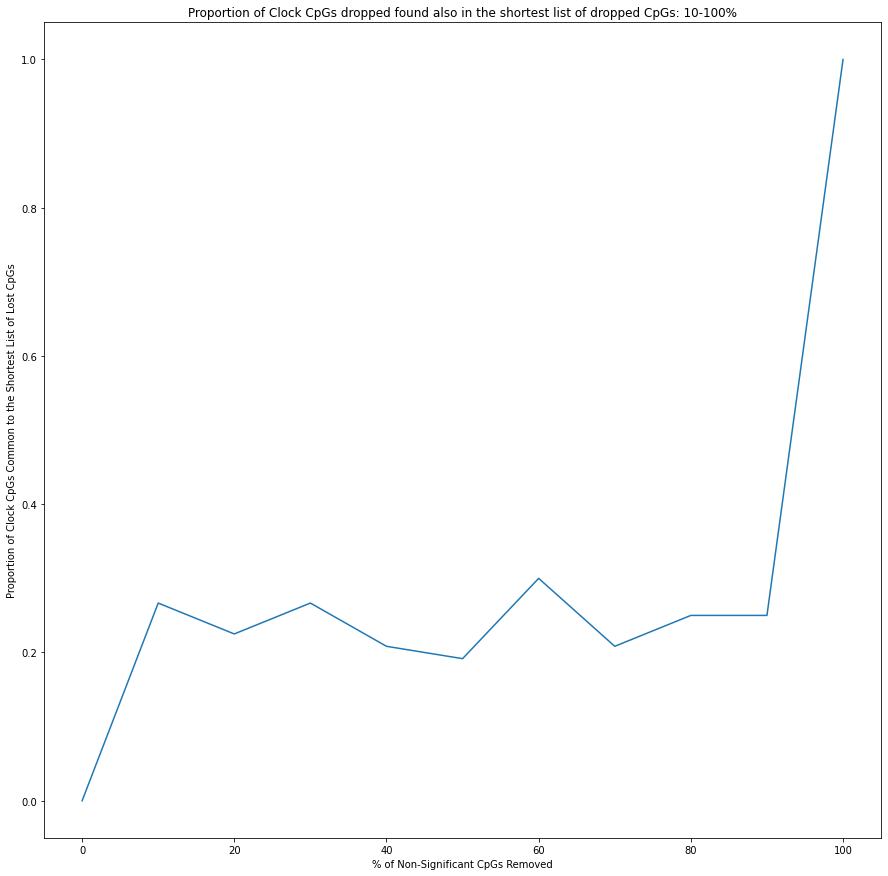

In [123]:
#Plot the percent of "Lost CpGs" which are common to the smallesst lost list
plt.figure(figsize=(15, 15))
plt.title("Proportion of Clock CpGs dropped found also in the shortest list of dropped CpGs: 10-100%")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Proportion of Clock CpGs Common to the Shortest List of Lost CpGs")
plt.plot(space, percent_common_lost )

# Find the change in Clock CpG Weights in Each EN model
This section of the program find the weights each model assigns to its Clock CpGs, and compares the average assigned weight in each model, the average absolute weight in each model, the average weight of each Clock CpG retained between the original EN and the new model, the average absolute weight of each Clock CpG retained between the original EN and the new model, Average Change in the Weight of Clock CpGs Retained with a positive weight in Original Model, Average Change in the Weight of Clock CpGs Retained with a negative weight in the original EN

In [124]:
#Create lists for the quantities we wish to plot
average_magnitude = [0]
average_abs_magnitude = [0]
change_absolute = [0]
change = [0]
change_init_pos = [0]
change_init_neg = [0]

#We run this process for EN with 1-10% of nonsig CpGs removed.
for i in range(1,11):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    #Create a list of Clock CpGs with magnitude and rank
    coeff_test_set = coeffs_set.reindex(coeffs_set.Magnitude.abs().sort_values(ascending=False).index)
    coeff_test_set["CpG"] = colnames_set.iloc[coeff_test_set.index]
    coeff_test_set["Rank"] = [i for i in range(1,len(coeff_test_set.index)+1)]

    #Find CpGs which are in original Clock CpGs and not in the new list and vice versa
    cpgs_lost = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    cpgs_gained = loss( sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list() )

    #Find average absolute weight of Clock CpGs and average weight of Clock CpGs
    average_abs_magnitude.append(coeff_test_set["Magnitude"].abs().mean() - coeff_test["Magnitude"].abs().mean()) 
    average_magnitude.append(coeff_test_set["Magnitude"].mean() - coeff_test["Magnitude"].mean()) 
    
    #Create Table of Only common CpGs between original En and new EN model, with weights from the original EN
    coeff_same = coeff_test.copy()
    for item in cpgs_lost:
        coeff_same = coeff_same[(coeff_same["CpG"].str.contains(item)==False)]

    #Create Table of Only common CpGs between original EN and new EN model, with weights from the new EN
    coeff_same_set = coeff_test_set.copy()
    for item in cpgs_gained:
        coeff_same_set = coeff_same_set[(coeff_same_set["CpG"].str.contains(item)==False)]

    #Find The change in average absolute weight and average weight for retained CpGs
    if len(coeff_same_set) == len(coeff_same):
        change_absolute.append(coeff_same_set["Magnitude"].abs().mean() - coeff_same["Magnitude"].abs().mean())
        change.append(coeff_same_set["Magnitude"].mean() - coeff_same["Magnitude"].mean())

    else:
        print("something went wrong with finding change in Clock CpGs")

    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the original EN model
    coeff_same_pos = coeff_same[(coeff_same["Magnitude"] >0 )]     

    #Find CpGs which are correlated negatively with age in the original model and are in the new model's Clock CpGs
    #Note that, as Clock CpGs by definition have non zero weights, this will be a negative wheight list
    cpgs_non_pos = loss( sig_cpgs_set["CpG"].to_list(), coeff_same_pos["CpG"].to_list() )
    
    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the new EN model
    coeff_same_pos_set = coeff_same_set
    for item in cpgs_non_pos:
        coeff_same_pos_set = coeff_same_pos_set[(coeff_same_pos_set["CpG"].str.contains(item)==False)]

    #Find The change in the average weight for retained CpGs, which originally had weight positively correlatd with Age
    if len(coeff_same_pos) == len(coeff_same_pos_set):
        change_init_pos.append(coeff_same_pos_set["Magnitude"].mean() - coeff_same_pos["Magnitude"].mean() )
    else:
        print("something went wrong with finding change in initially positively weighted CpGs")
        
    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the original EN model
    coeff_same_neg = coeff_same[(coeff_same["Magnitude"] <0 )]

    #Find CpGs which are correlated positively with age in the original model and are in the new model's Clock CpGs
    #Note that, as Clock CpGs by definition have non zero weights, this will be a positive wheight list
    cpgs_non_neg = loss( sig_cpgs_set["CpG"].to_list(), coeff_same_neg["CpG"].to_list() )
    
    #Find Table of retained CpGs whith weights which correlate negatively with age in the Original EN, 
    #with weights from the new EN model
    coeff_same_neg_set = coeff_same_set
    for item in cpgs_non_neg:
        coeff_same_neg_set = coeff_same_neg_set[(coeff_same_neg_set["CpG"].str.contains(item)==False)]

    #Find The change in the average weight for retained CpGs, which originally had weight negatively correlatd with Age
    if len(coeff_same_neg) == len(coeff_same_neg_set):
        change_init_neg.append(coeff_same_neg_set["Magnitude"].mean() - coeff_same_neg["Magnitude"].mean() )

    else:
        print("something went wrong with finding change in initially negatively weighted CpGs")


# Plot the change in weights bellow

In [125]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 11)]
space

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

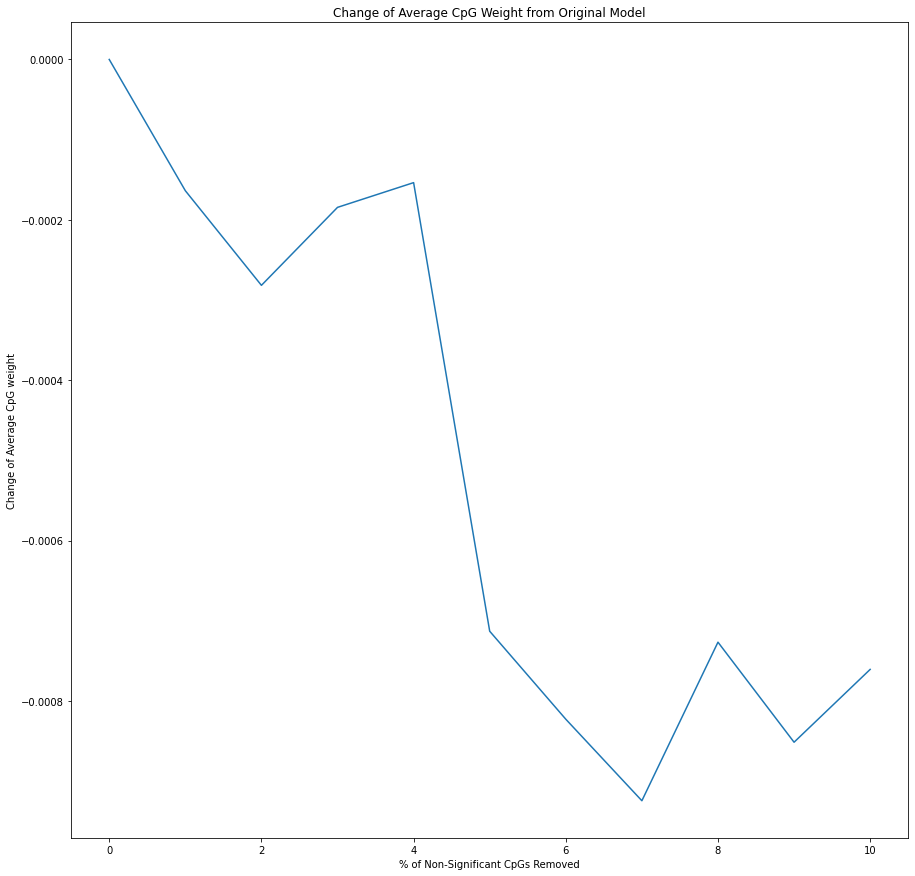

In [126]:
plt.figure(figsize=(15, 15))

plt.title("Change of Average CpG Weight from Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Change of Average CpG weight")

plt.plot(space, average_magnitude )

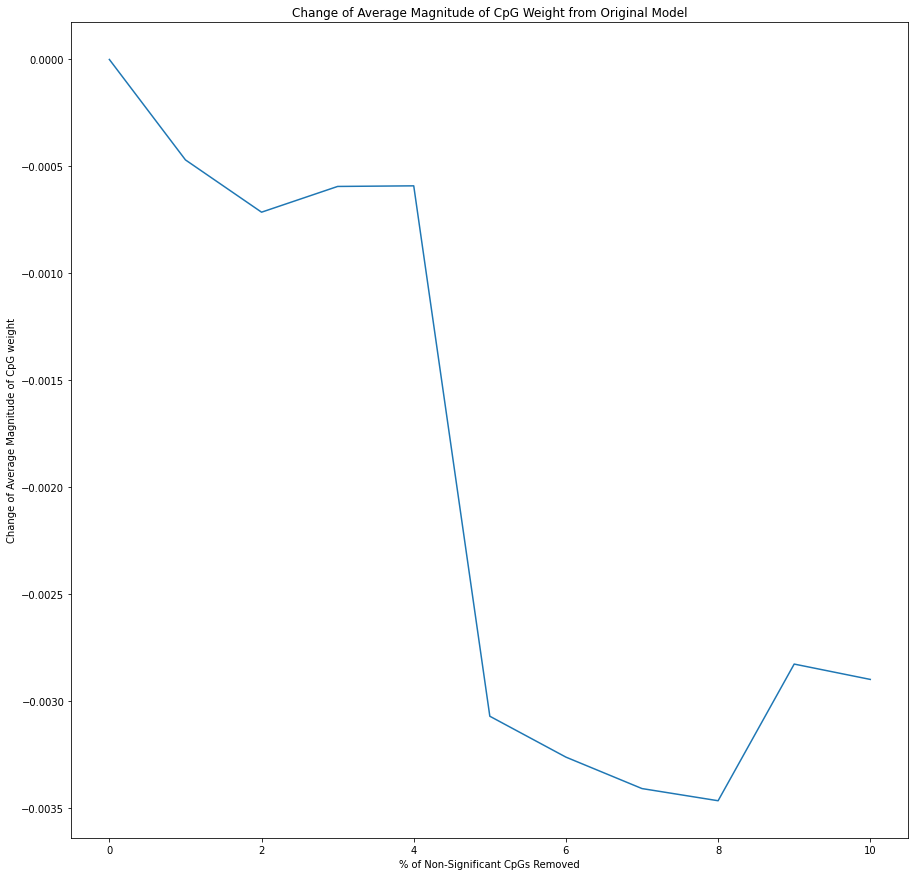

In [127]:
plt.figure(figsize=(15, 15))
plt.title("Change of Average Magnitude of CpG Weight from Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Change of Average Magnitude of CpG weight")
plt.plot(space, average_abs_magnitude )

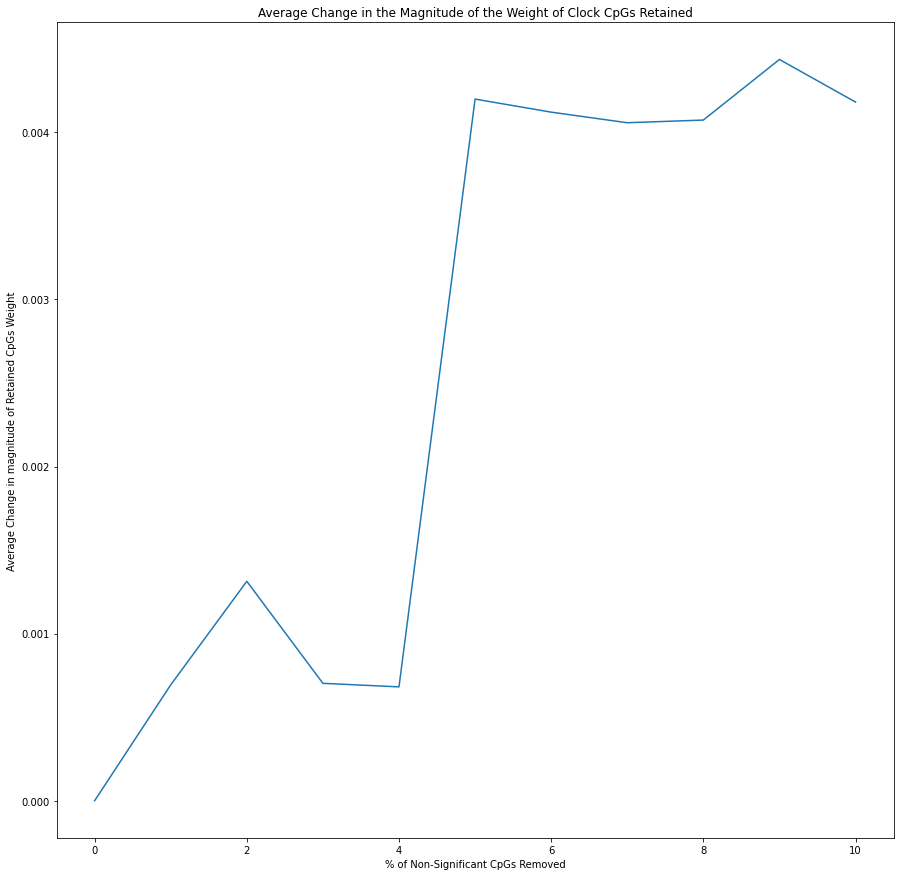

In [128]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Magnitude of the Weight of Clock CpGs Retained")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in magnitude of Retained CpGs Weight")
plt.plot(space, change_absolute )

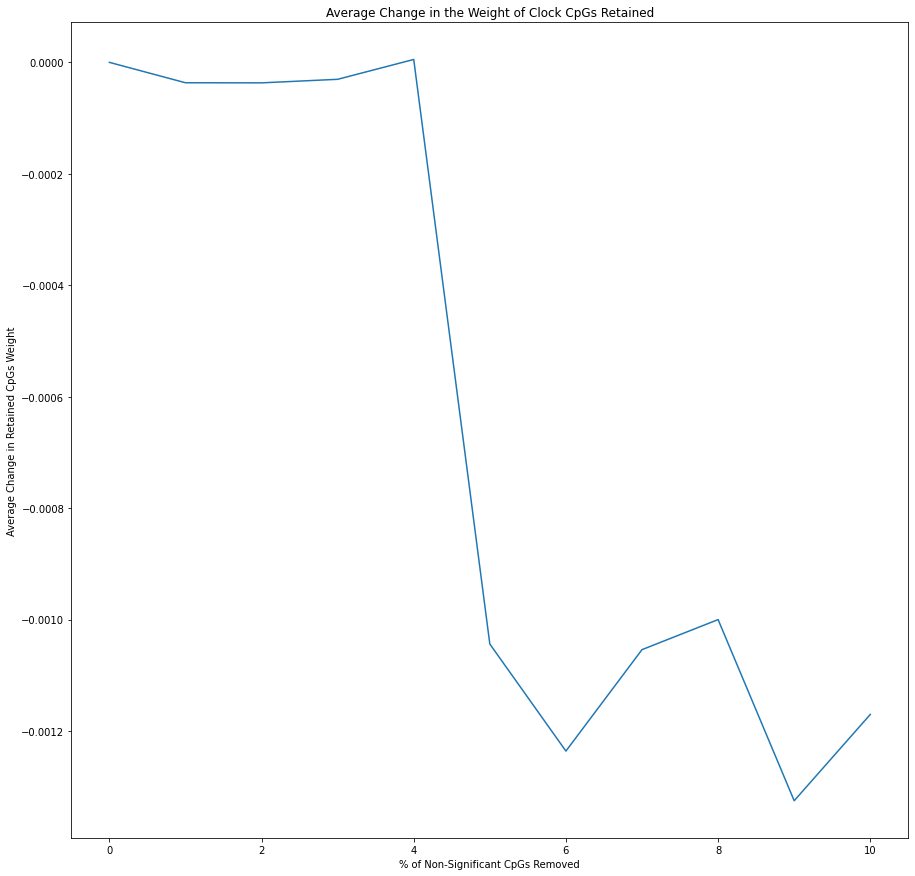

In [129]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change)

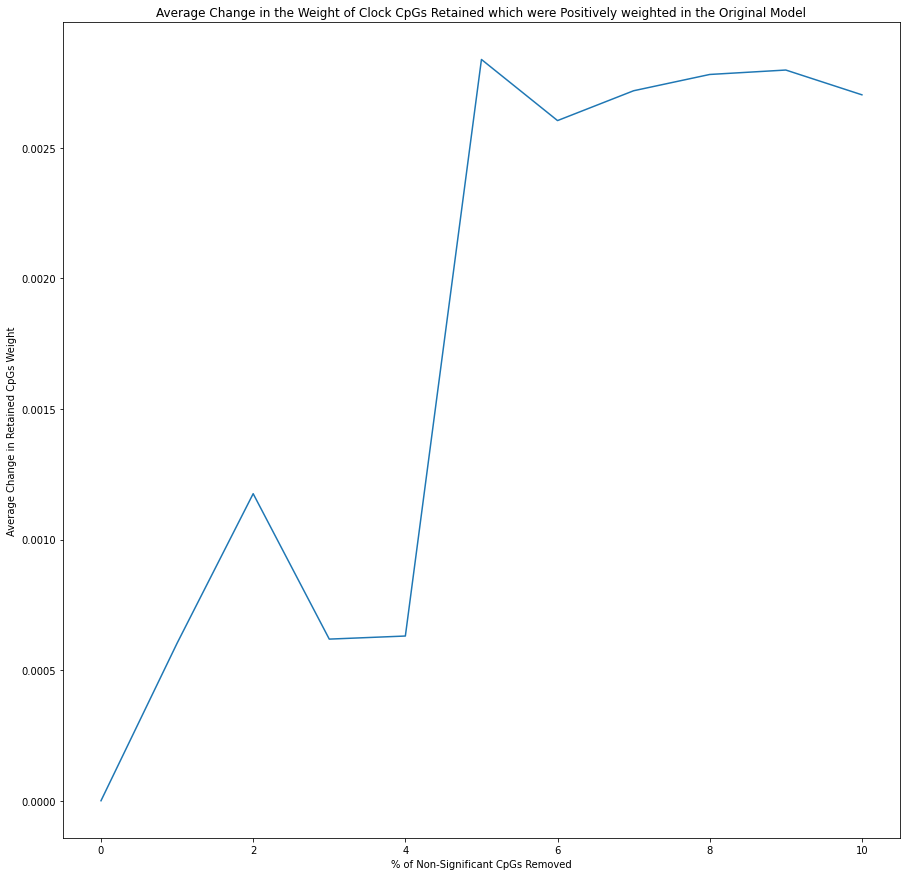

In [130]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained which were Positively weighted in the Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change_init_pos)

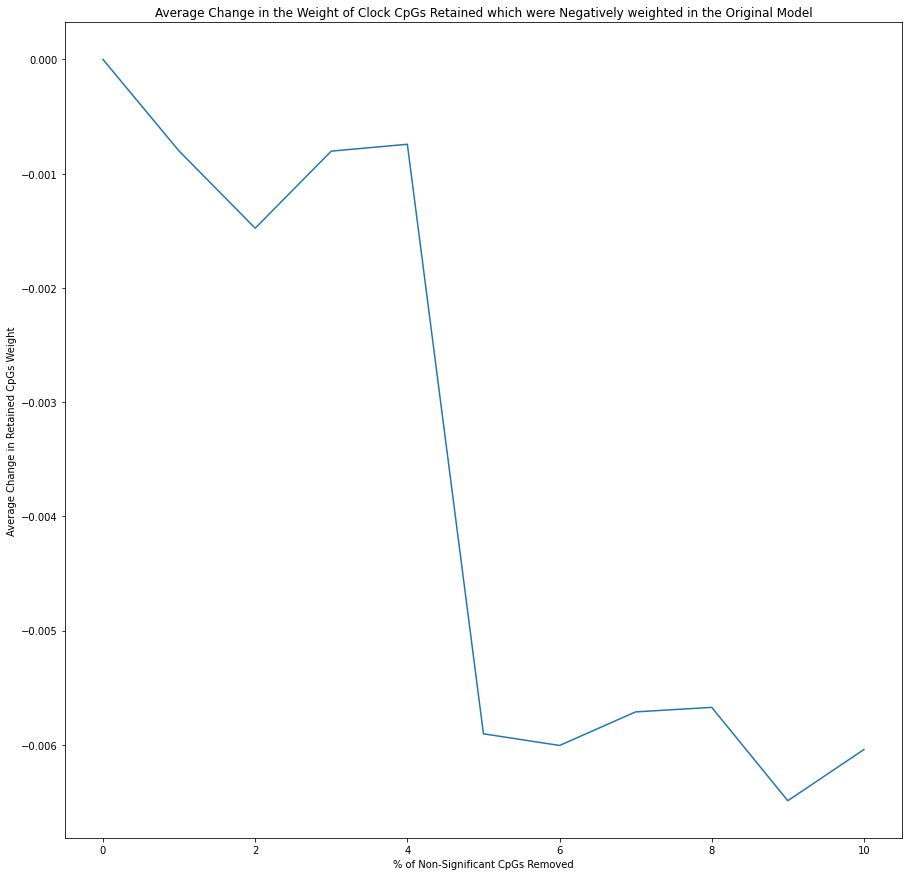

In [131]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained which were Negatively weighted in the Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change_init_neg)

In [132]:
#Create lists for the quantities we wish to plot
average_magnitude = [0]
average_abs_magnitude = [0]
change_absolute = [0]
change = [0]
change_init_pos = [0]
change_init_neg = [0]

#We run this process for EN with 1-10% of nonsig CpGs removed.
for i in range(10,110, 10):
    
    #Load the Elastic Net model and Dataset with the desired percent of nonsig CpGs removed
    enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_' + str(i) + '_i5000.joblib')
    dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_' + str(i) + '% nonsig removed.pkl')
    
    #Get the non-zero coefficients to get the significant cpgs.
    coeffs_set = pd.DataFrame(enet.coef_)
    coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
    coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})
    
    #Get significant CpGs and their indices
    colnames_set = pd.DataFrame(dataset.columns)
    sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

    #Create a list of Clock CpGs with magnitude and rank
    coeff_test_set = coeffs_set.reindex(coeffs_set.Magnitude.abs().sort_values(ascending=False).index)
    coeff_test_set["CpG"] = colnames_set.iloc[coeff_test_set.index]
    coeff_test_set["Rank"] = [i for i in range(1,len(coeff_test_set.index)+1)]

    #Find CpGs which are in original Clock CpGs and not in the new list and vice versa
    cpgs_lost = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
    cpgs_gained = loss( sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list() )

    #Find average absolute weight of Clock CpGs and average weight of Clock CpGs
    average_abs_magnitude.append(coeff_test_set["Magnitude"].abs().mean() - coeff_test["Magnitude"].abs().mean()) 
    average_magnitude.append(coeff_test_set["Magnitude"].mean() - coeff_test["Magnitude"].mean()) 
    
    #Create Table of Only common CpGs between original En and new EN model, with weights from the original EN
    coeff_same = coeff_test.copy()
    for item in cpgs_lost:
        coeff_same = coeff_same[(coeff_same["CpG"].str.contains(item)==False)]

    #Create Table of Only common CpGs between original EN and new EN model, with weights from the new EN
    coeff_same_set = coeff_test_set.copy()
    for item in cpgs_gained:
        coeff_same_set = coeff_same_set[(coeff_same_set["CpG"].str.contains(item)==False)]

    #Find The change in average absolute weight and average weight for retained CpGs
    if len(coeff_same_set) == len(coeff_same):
        change_absolute.append(coeff_same_set["Magnitude"].abs().mean() - coeff_same["Magnitude"].abs().mean())
        change.append(coeff_same_set["Magnitude"].mean() - coeff_same["Magnitude"].mean())

    else:
        print("something went wrong with finding change in Clock CpGs")

    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the original EN model
    coeff_same_pos = coeff_same[(coeff_same["Magnitude"] >0 )]     

    #Find CpGs which are correlated negatively with age in the original model and are in the new model's Clock CpGs
    #Note that, as Clock CpGs by definition have non zero weights, this will be a negative wheight list
    cpgs_non_pos = loss( sig_cpgs_set["CpG"].to_list(), coeff_same_pos["CpG"].to_list() )
    
    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the new EN model
    coeff_same_pos_set = coeff_same_set
    for item in cpgs_non_pos:
        coeff_same_pos_set = coeff_same_pos_set[(coeff_same_pos_set["CpG"].str.contains(item)==False)]

    #Find The change in the average weight for retained CpGs, which originally had weight positively correlatd with Age
    if len(coeff_same_pos) == len(coeff_same_pos_set):
        change_init_pos.append(coeff_same_pos_set["Magnitude"].mean() - coeff_same_pos["Magnitude"].mean() )
    else:
        print("something went wrong with finding change in initially positively weighted CpGs")
        
    #Find Table of retained CpGs whith weights which correlate positively with age in the Original EN, 
    #with weights from the original EN model
    coeff_same_neg = coeff_same[(coeff_same["Magnitude"] <0 )]

    #Find CpGs which are correlated positively with age in the original model and are in the new model's Clock CpGs
    #Note that, as Clock CpGs by definition have non zero weights, this will be a positive wheight list
    cpgs_non_neg = loss( sig_cpgs_set["CpG"].to_list(), coeff_same_neg["CpG"].to_list() )
    
    #Find Table of retained CpGs whith weights which correlate negatively with age in the Original EN, 
    #with weights from the new EN model
    coeff_same_neg_set = coeff_same_set
    for item in cpgs_non_neg:
        coeff_same_neg_set = coeff_same_neg_set[(coeff_same_neg_set["CpG"].str.contains(item)==False)]

    #Find The change in the average weight for retained CpGs, which originally had weight negatively correlatd with Age
    if len(coeff_same_neg) == len(coeff_same_neg_set):
        change_init_neg.append(coeff_same_neg_set["Magnitude"].mean() - coeff_same_neg["Magnitude"].mean() )

    else:
        print("something went wrong with finding change in initially negatively weighted CpGs")


# Plot the change in weights bellow

In [133]:
#Create list for % of nonsig CpGs removed
space = [i for i in range(0, 110, 10)]
space

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

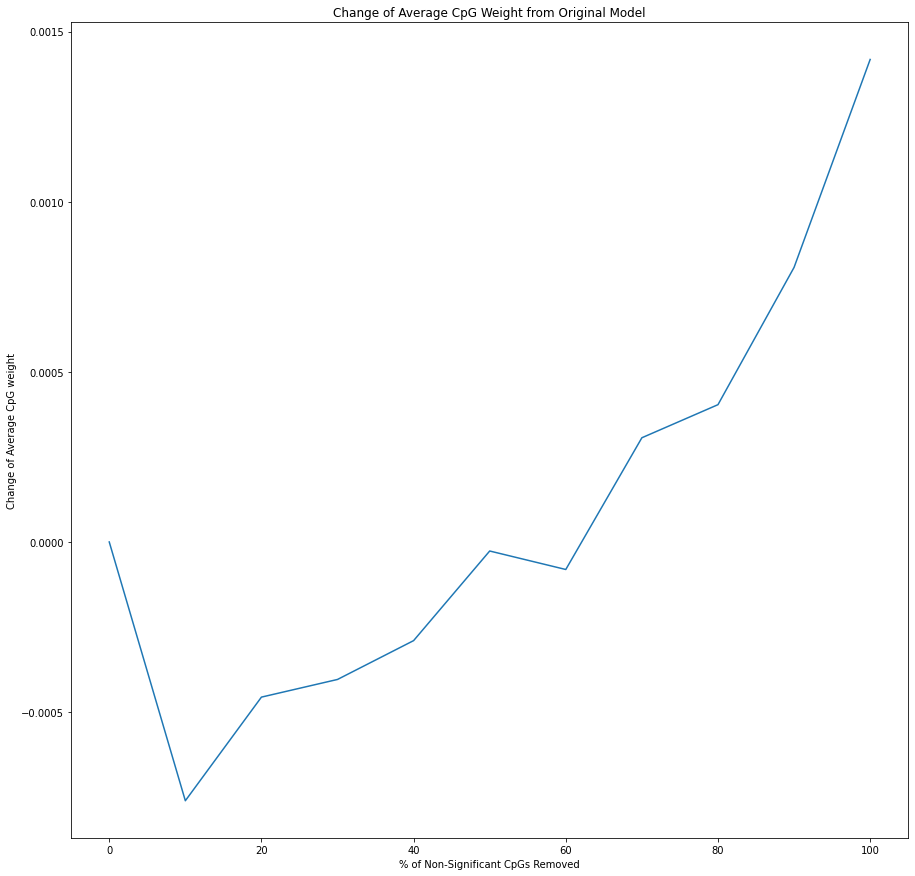

In [134]:
plt.figure(figsize=(15, 15))

plt.title("Change of Average CpG Weight from Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Change of Average CpG weight")

plt.plot(space, average_magnitude )

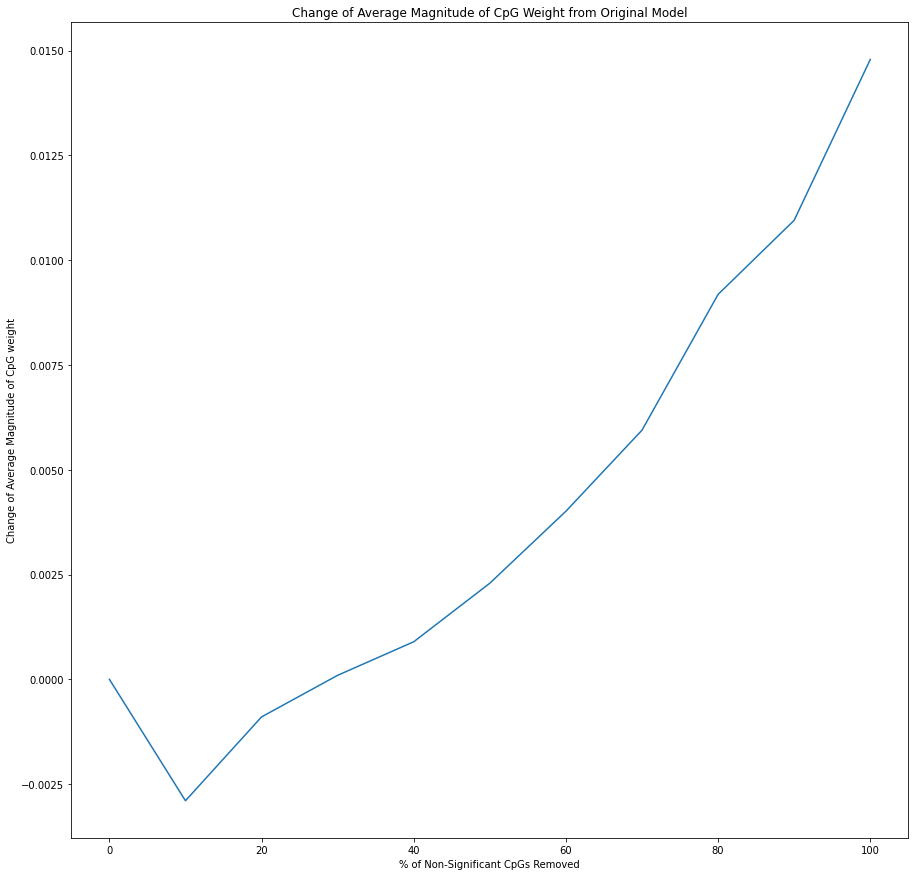

In [135]:
plt.figure(figsize=(15, 15))
plt.title("Change of Average Magnitude of CpG Weight from Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Change of Average Magnitude of CpG weight")
plt.plot(space, average_abs_magnitude )

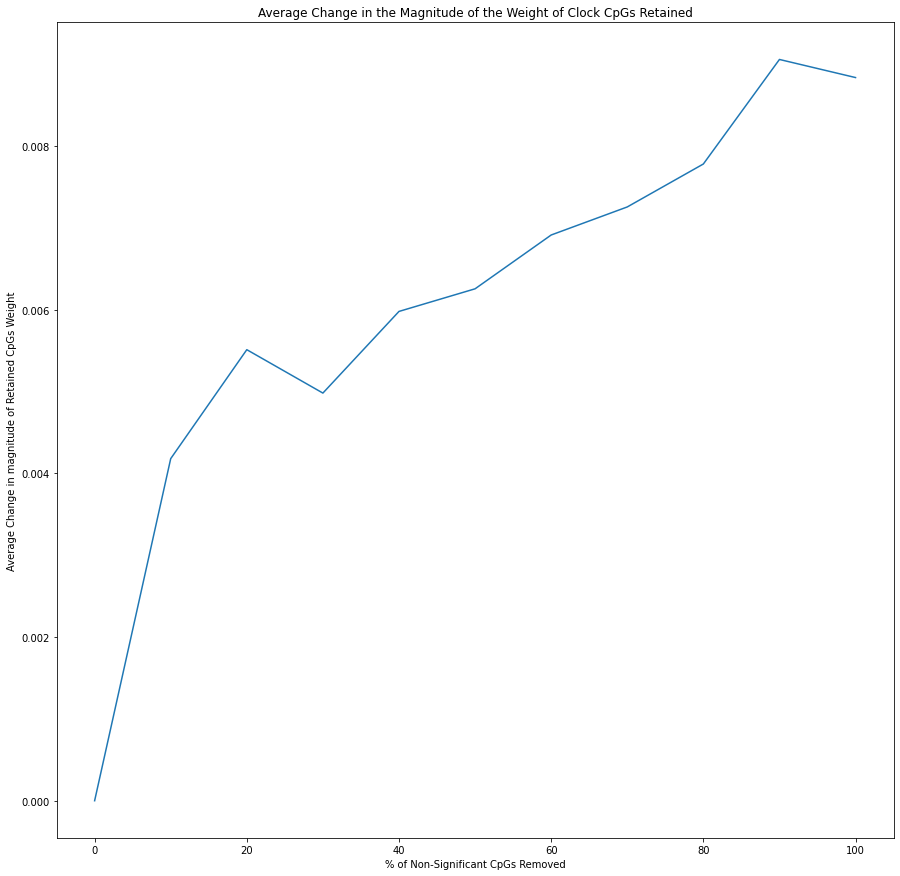

In [136]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Magnitude of the Weight of Clock CpGs Retained")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in magnitude of Retained CpGs Weight")
plt.plot(space, change_absolute )

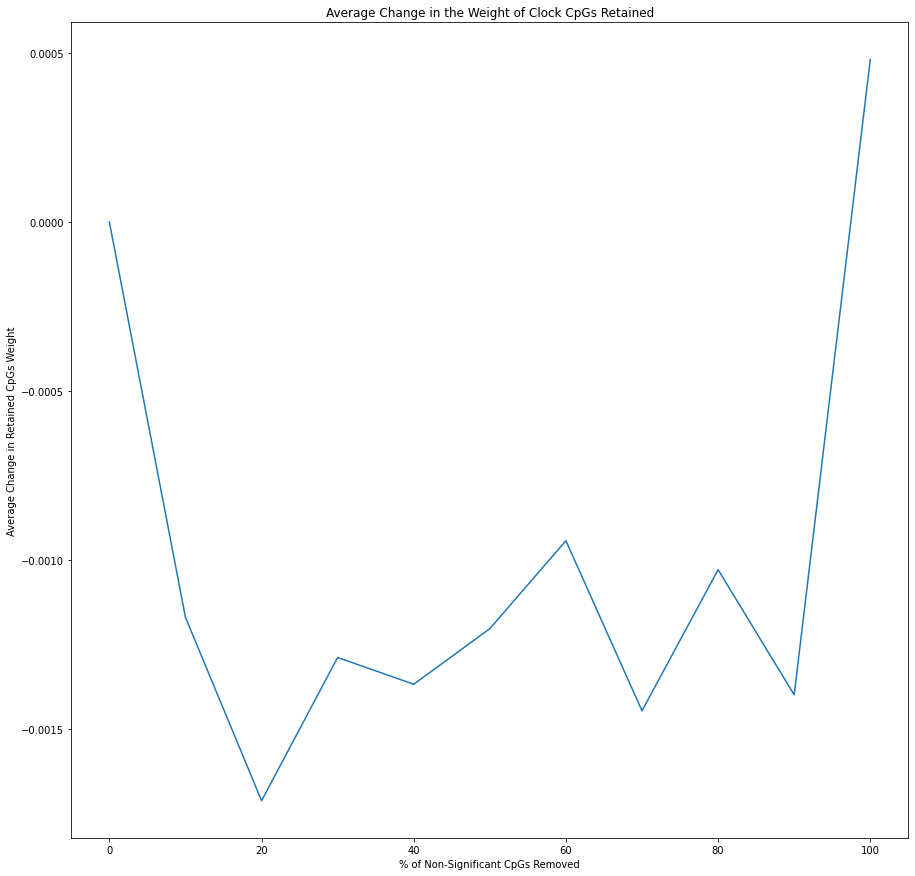

In [137]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change)

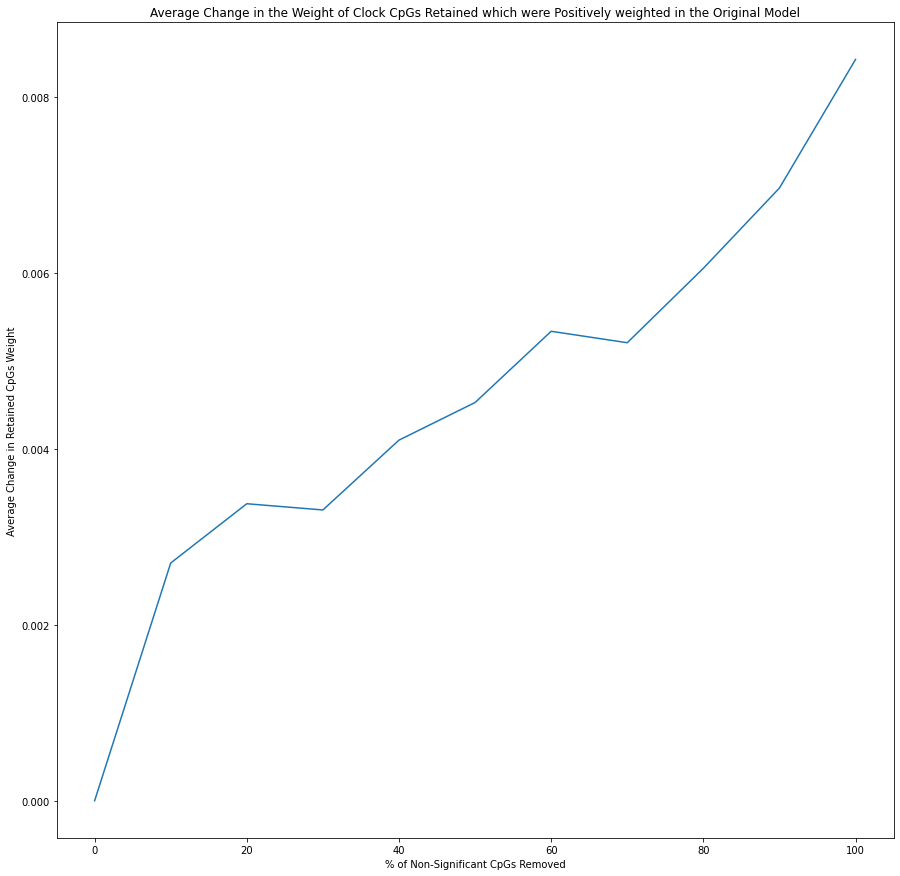

In [138]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained which were Positively weighted in the Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change_init_pos)

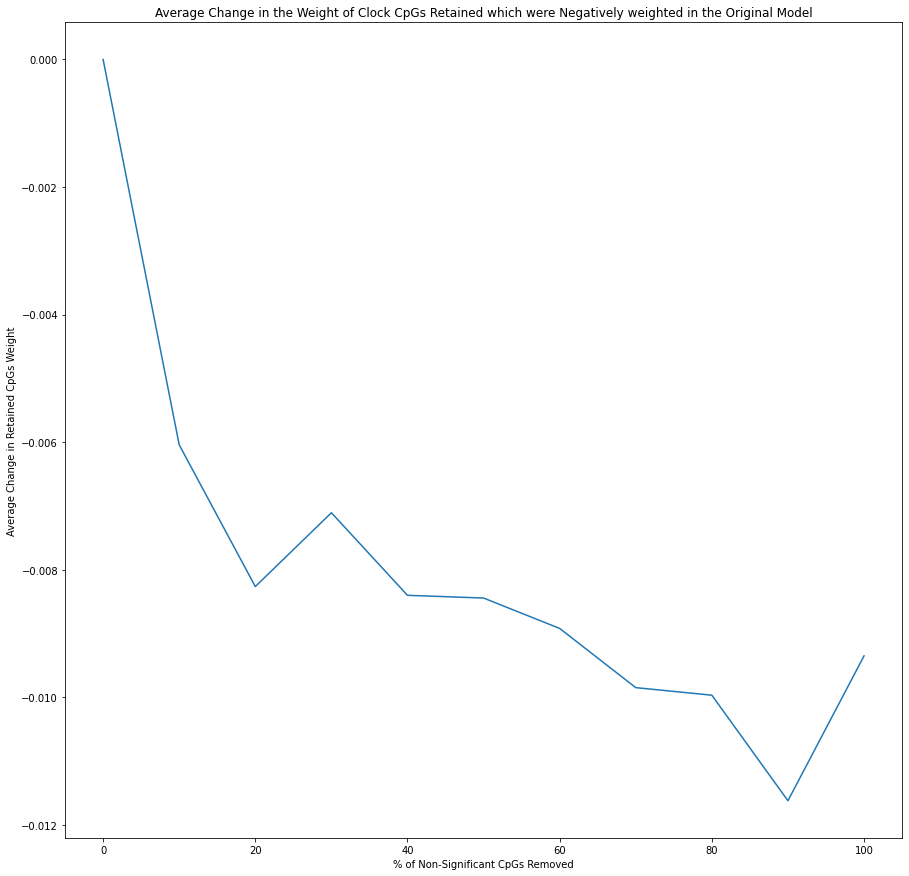

In [139]:
plt.figure(figsize=(15, 15))
plt.title("Average Change in the Weight of Clock CpGs Retained which were Negatively weighted in the Original Model")
plt.xlabel("% of Non-Significant CpGs Removed")
plt.ylabel("Average Change in Retained CpGs Weight")
plt.plot(space, change_init_neg)

# Create figure from 20% removed (the largest effect on average retained weight)

In [140]:
#Load the EN model and dataset with 20% of nonsig removed and find clock CpGs
enet =  load(parent + '/Trained_Models/elastic_netCV_Hannum_20_i5000.joblib')
dataset =  pd.read_pickle(parent + '/MethylAndAges/hannum_20% nonsig removed.pkl')
coeffs_set = pd.DataFrame(enet.coef_)
coeffs_set = coeffs_set[(coeffs_set.T != 0).any()]
coeffs_set = coeffs_set.rename(columns={coeffs_set.columns[0]: 'Magnitude'})


In [141]:
#Get significant CpGs and their indices
colnames_set = pd.DataFrame(dataset.columns)
sig_cpgs_set = colnames_set.iloc[coeffs_set.index]

#Create a table of Clock CpGs and Rank them
coeff_test_set = coeffs_set.reindex(coeffs_set.Magnitude.abs().sort_values(ascending=False).index)
coeff_test_set["CpG"] = colnames_set.iloc[coeff_test_set.index]
coeff_test_set["Rank"] = [i for i in range(1,len(coeff_test_set.index)+1)]


In [142]:
coeff_test_set

,Magnitude,CpG,Rank
241557,0.773236,cg16867657,1
155036,-0.710258,cg10501210,2
122101,0.523871,cg08097417,3
208008,0.437740,cg14361627,4
145567,-0.384658,cg09809672,5
...,...,...,...
146400,0.000063,cg09865454,943
95918,-0.000033,cg06314568,944
271762,-0.000018,cg19308365,945
258740,-0.000012,cg18240463,946


In [143]:
#Find Tables of Common CpGs and their Wheights as ranked by their original weight. 
cpgs_lost = loss(sig_cpgs_original["CpG"].to_list(), sig_cpgs_set["CpG"].to_list() )
cpgs_gained = loss( sig_cpgs_set["CpG"].to_list(), sig_cpgs_original["CpG"].to_list() )

coeff_same = coeff_test.copy()
for item in cpgs_lost:
    coeff_same = coeff_same[(coeff_same["CpG"].str.contains(item)==False)]

coeff_same_set = coeff_test_set.copy()
for item in cpgs_gained:
    coeff_same_set = coeff_same_set[(coeff_same_set["CpG"].str.contains(item)==False)]
    
coeff_same_set = coeff_same_set.reindex(coeff_same_set.CpG.sort_values(ascending=False).index)
coeff_same = coeff_same.reindex(coeff_same.CpG.sort_values(ascending=False).index)

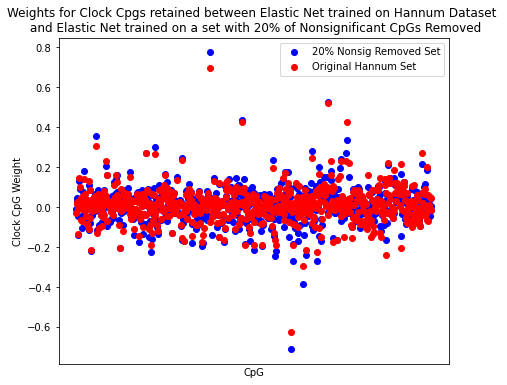

In [144]:
#Create the figure with 1 subplot
fig,ax = plt.subplots(1, figsize=(7, 6))


ax.scatter(coeff_same_set["CpG"].to_list(), coeff_same_set["Magnitude"].to_list(), color = 'blue', label='20% Nonsig Removed Set')
ax.scatter(coeff_same["CpG"].to_list(), coeff_same["Magnitude"].to_list(), color='red', label='Original Hannum Set')

ax.set_xlabel('CpG')
ax.set_ylabel('Clock CpG Weight')

ax.set_xticklabels([])
ax.set_xticks([])

ax.legend(loc='best')
ax.set_title("Weights for Clock Cpgs retained between Elastic Net trained on Hannum Dataset \n and Elastic Net trained on a set with 20% of Nonsignificant CpGs Removed")

#Save the Figure
plt.show()
